Import libraries

Taken from website:-
https://ourworldindata.org/coronavirus-source-data

In [167]:
import pandas as pd
import numpy as np

Read files

In [168]:
# load datasets
train = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82983,ZWE,Africa,Zimbabwe,2021-04-16,37534.0,112.0,55.286,1551.0,1.0,2.286,2525.344,7.536,3.720,104.354,0.067,0.154,1.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,467104.0,31.427,0.136,1942.0,0.131,0.028,35.1,tests performed,304701.0,269732.0,34969.0,18820.0,14071.0,2.05,1.81,0.24,947.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82984,ZWE,Africa,Zimbabwe,2021-04-17,37699.0,165.0,60.857,1552.0,1.0,2.000,2536.445,11.101,4.095,104.421,0.067,0.135,1.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2311.0,469415.0,31.583,0.155,1962.0,0.132,0.031,32.2,tests performed,311901.0,276095.0,35806.0,7200.0,12738.0,2.10,1.86,0.24,857.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82985,ZWE,Africa,Zimbabwe,2021-04-18,37751.0,52.0,66.143,1553.0,1.0,2.143,2539.944,3.499,4.450,104.488,0.067,0.144,1.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,314446.0,278583.0,35863.0,2545.0,12993.0,2.12,1.87,0.24,874.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82986,ZWE,Africa,Zimb

In [169]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82988 entries, 0 to 82987
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               82988 non-null  object 
 1   continent                              78967 non-null  object 
 2   location                               82988 non-null  object 
 3   date                                   82988 non-null  object 
 4   total_cases                            81082 non-null  float64
 5   new_cases                              81080 non-null  float64
 6   new_cases_smoothed                     80079 non-null  float64
 7   total_deaths                           71498 non-null  float64
 8   new_deaths                             71656 non-null  float64
 9   new_deaths_smoothed                    80079 non-null  float64
 10  total_cases_per_million                80643 non-null  float64
 11  ne

Convert date to number

In [171]:
import datetime 

date = train.date

train['date'] = pd.to_datetime(train['date'], errors='coerce')
train['date_num'] = train['date'].dt.strftime('%d%m%Y')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,24022020
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,25022020
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,26022020
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,27022020
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,28022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82983,ZWE,Africa,Zimbabwe,2021-04-16,37534.0,112.0,55.286,1551.0,1.0,2.286,2525.344,7.536,3.720,104.354,0.067,0.154,1.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,467104.0,31.427,0.136,1942.0,0.131,0.028,35.1,tests performed,304701.0,269732.0,34969.0,18820.0,14071.0,2.05,1.81,0.24,947.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16042021
82984,ZWE,Africa,Zimbabwe,2021-04-17,37699.0,165.0,60.857,1552.0,1.0,2.000,2536.445,11.101,4.095,104.421,0.067,0.135,1.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2311.0,469415.0,31.583,0.155,1962.0,0.132,0.031,32.2,tests performed,311901.0,276095.0,35806.0,7200.0,12738.0,2.10,1.86,0.24,857.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,17042021
82985,ZWE,Africa,Zimbabwe,2021-04-18,37751.0,52.0,66.143,1553.0,1.0,2.143,2539.944,3.499,4.450,104.488,0.067,0.144,1.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,314446.0,278583.0,35863.0,2545.0,12993.0,2.12,1.87,0.24,874.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899

Country

In [172]:
country = train['location'].to_list()

# using naive method to remove duplicated from list  
list_country = [] 
for i in country: 
    if i not in list_country: 
        list_country.append(i) 

list_country

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',
 'Faeroe Islands',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 'Gabon'

In [173]:
print(len(list_country))

219


Get latest date

In [174]:
from datetime import date 
from datetime import timedelta

In [175]:
today = date.today() 
print("Today is: ", today) 

Today is:  2021-04-21


In [176]:
yesterday = today - timedelta(days = 1) 
print("Yesterday was: ", yesterday)

Yesterday was:  2021-04-20


In [177]:
last_date = train.date.max()
last_date

Timestamp('2021-04-20 00:00:00')

In [178]:
print(type(last_date))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [179]:
yesterday = pd.Timestamp(yesterday)

In [180]:
print(type(yesterday))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [181]:
if last_date == yesterday: 
    last_date = yesterday
elif last_date > yesterday: 
    last_date = yesterday 
else: 
    last_date = last_date
last_date


Timestamp('2021-04-20 00:00:00')

In [182]:
last_date = train[train.date == last_date]
last_date

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
421,AFG,Asia,Afghanistan,2021-04-20,58037.0,139.0,96.143,2549.0,3.0,2.857,1490.868,3.571,2.470,65.479,0.077,0.073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,20042021
854,OWID_AFR,NaN,Africa,2021-04-20,4450504.0,10111.0,11458.143,118608.0,411.0,318.571,3319.790,7.542,8.547,88.474,0.307,0.238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15475477.0,10591039.0,4656514.0,63625.0,157090.0,1.15,0.79,0.35,117.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20042021
1275,ALB,Europe,Albania,2021-04-20,129842.0,148.0,155.714,2353.0,6.0,3.857,45118.493,51.428,54.109,817.638,2.085,1.340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350000.0,NaN,NaN,4066.0,9826.0,12.16,NaN,NaN,3414.0,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,20042021
1696,DZA,Africa,Algeria,2021-04-20,119992.0,187.0,170.429,3165.0,5.0,4.000,2736.355,4.264,3.887,72.176,0.114,0.091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,20042021
2111,AND,Europe,Andorra,2021-04-20,12874.0,69.0,37.143,123.0,0.0,0.286,166621.368,893.030,480.720,1591.924,0.000,3.698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,20042021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81360,VNM,Asia,Vietnam,2021-04-20,2800.0,9.0,12.286,35.0,0.0,0.000,28.766,0.092,0.126,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106929.0,106929.0,NaN,26072.0,6684.0,0.11,0.11,NaN,69.0,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704,20042021
81815,OWID_WRL,NaN,World,2021-04-20,142946244.0,847824.0,786203.429,3043955.0,14140.0,12113.857,18338.670,108.768,100.863,390.511,1.814,1.554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,928675144.0,515309899.0,212517441.0,6237954.0,14391217.0,11.91,6.61,2.73,1846.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,20042021
82191,YEM,Asia,Yemen,2021-04-20,5918.0,60.0,58.714,1138.0,6.0,9.286,198.418,2.012,1.969,38.155,0.201,0.311,NaN,NaN,NaN,Na

Graphical representation

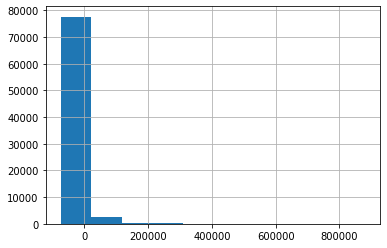

In [183]:
from matplotlib import pyplot as plt

train.new_cases.hist()

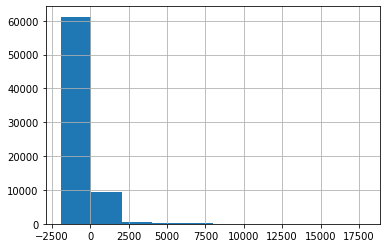

In [184]:
train.new_deaths.hist()

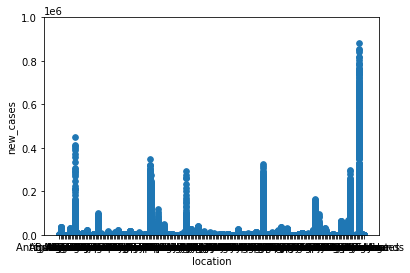

In [185]:
var = 'location'
data = pd.concat([train['new_cases'], train[var]], axis=1)
data.plot.scatter(x=var, y='new_cases', ylim=(0,1000000), s=32);

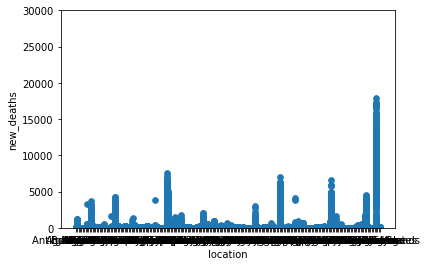

In [186]:
var = 'location'
data = pd.concat([train['new_deaths'], train[var]], axis=1)
data.plot.scatter(x=var, y='new_deaths', ylim=(0,30000), s=32);

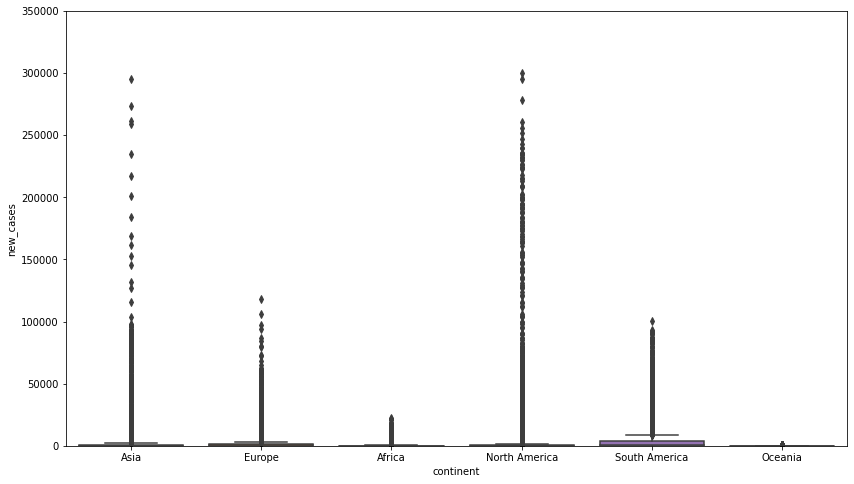

In [187]:
import seaborn as sns

var = 'continent'
data = pd.concat([train['new_cases'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_cases", data=data)
fig.axis(ymin=0, ymax=350000);

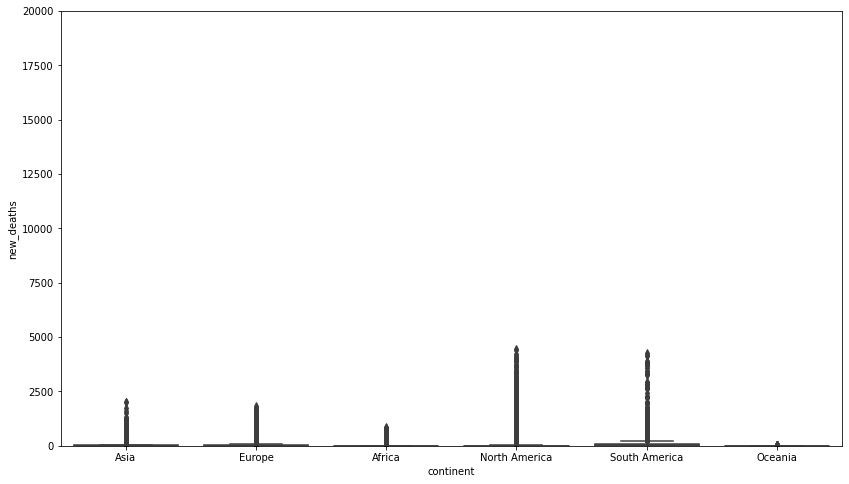

In [188]:
var = 'continent'
data = pd.concat([train['new_deaths'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_deaths", data=data)
fig.axis(ymin=0, ymax=20000);

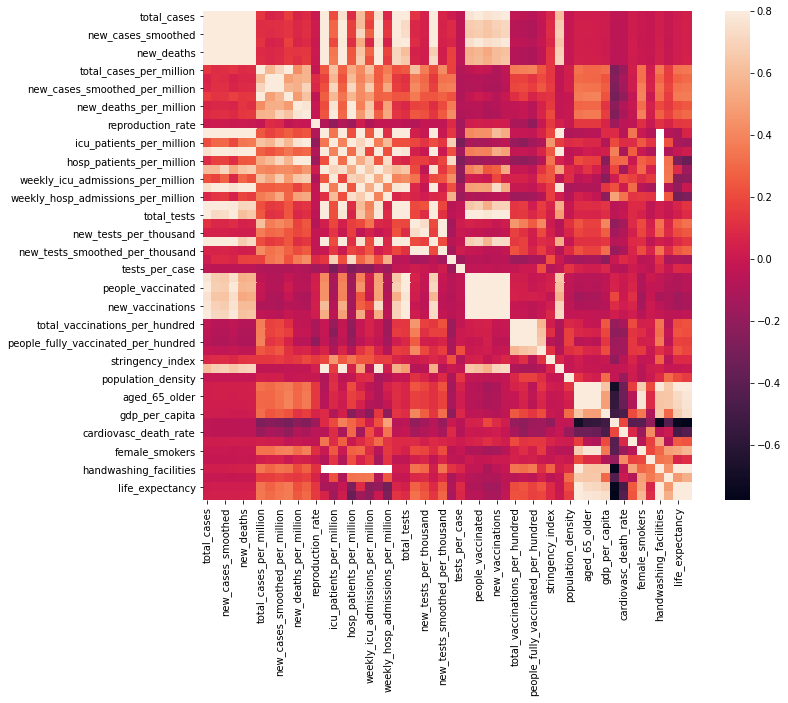

In [189]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

UK

In [190]:
country = "United Kingdom"

include_uk = train[train['location'].values == country]
exclude_uk = train[train['location'].values != country]
uk_cov19 = include_uk
uk_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
78224,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,31012020
78225,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,01022020
78226,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,02022020
78227,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,03022020
78228,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,04022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78665,GBR,Europe,United Kingdom,2021-04-16,4398903.0,2807.0,2676.571,127472.0,34.0,26.857,64798.379,41.349,39.427,1877.736,0.501,0.396,0.90,332.0,4.891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42140989.0,32709778.0,9431211.0,635221.0,448491.0,62.08,48.18,13.89,6607.0,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,16042021
78666,GBR,Europe,United Kingdom,2021-04-17,4401176.0,2273.0,2613.714,127508.0,36.0,26.286,64831.861,33.483,38.502,1878.266,0.530,0.387,0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42780069.0,32849223.0,9930846.0,639080.0,456025.0,63.02,48.39,14.63,6718.0,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,17042021
78667,GBR,Europe,United Kingdom,2021-04-18,4403060.0,1884.0,2635.714,127518.0,10.0,26.714,64859.614,27.752,38.826,1878.414,0.147,0.394,0.90,NaN,NaN,NaN,NaN,NaN,NaN,383.0,5.642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43084487.0,3293

Text(0, 0.5, 'uk_new_cases_per_million')

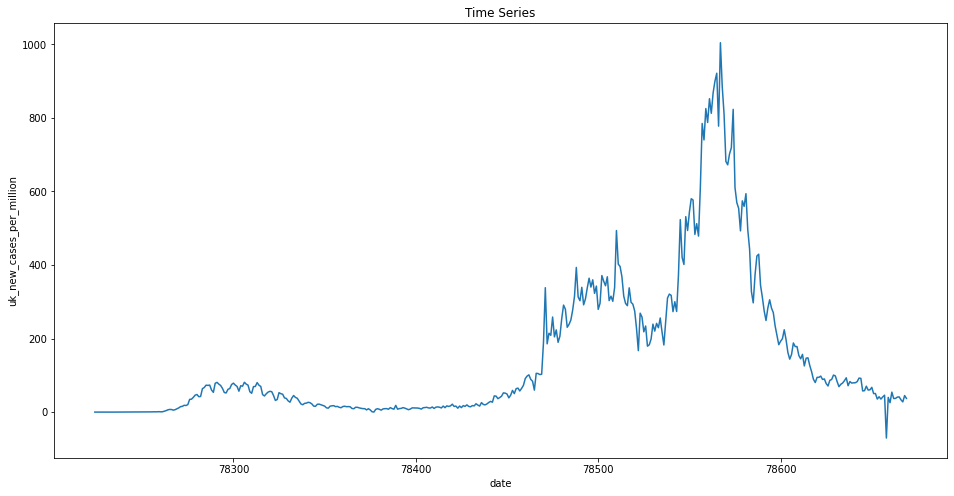

In [191]:
import matplotlib.pyplot as plt

uk_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("uk_new_cases_per_million")

Text(0, 0.5, 'uk_new_deaths_per_million')

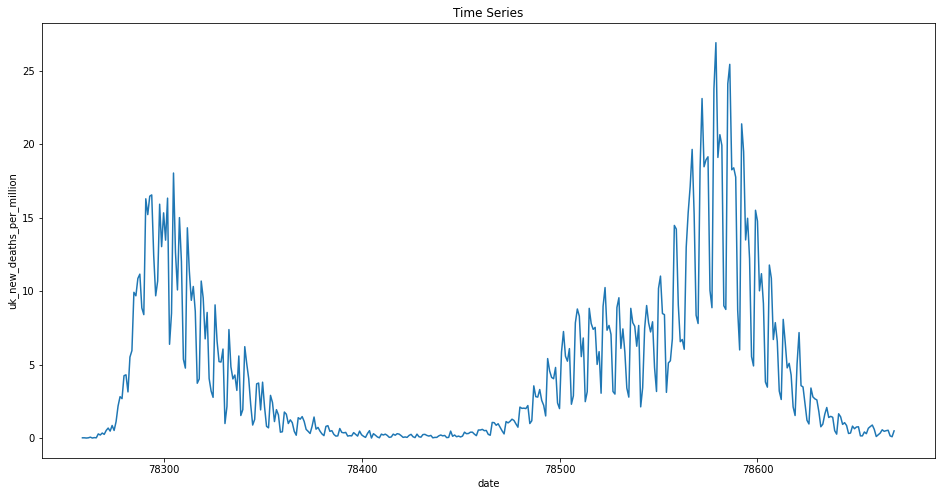

In [192]:
uk_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("uk_new_deaths_per_million")

US

In [193]:
country = "United States"

include_us = train[train['location'].values == country]
exclude_us = train[train['location'].values != country]
us_cov19 = include_us
us_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
78670,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,22012020
78671,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,23012020
78672,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,24012020
78673,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,25012020
78674,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,26012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79120,USA,North America,United States,2021-04-16,31575640.0,79991.0,70096.857,566224.0,861.0,713.143,95393.920,241.663,211.771,1710.633,2.601,2.154,0.98,9474.0,28.622,39079.0,118.062,NaN,NaN,NaN,NaN,810505.0,399565177.0,1207.136,2.449,922106.0,2.786,0.074,13.5,tests performed,202282923.0,127743096.0,80609818.0,3965883.0,3349306.0,60.48,38.20,24.10,10015.0,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,16042021
79121,USA,North America,United States,2021-04-17,31628013.0,52373.0,68073.714,566904.0,680.0,708.714,95552.145,158.225,205.659,1712.687,2.054,2.141,0.98,9472.0,28.616,39090.0,118.096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205871913.0,129494179.0,82471151.0,3588990.0,3200601.0,61.56,38.72,24.66,9570.0,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,17042021
79122,USA,North America,United States,2021-04-18,31670031.0,42018.0,67450.571,567217.0,313.0,712.571,956

Text(0, 0.5, 'us_new_cases_per_million')

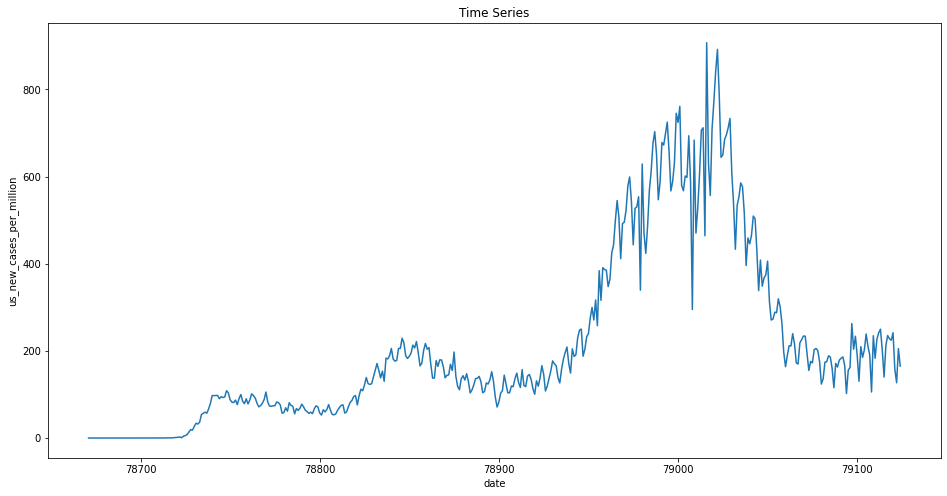

In [194]:
us_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_cases_per_million")

Text(0, 0.5, 'us_new_deaths_per_million')

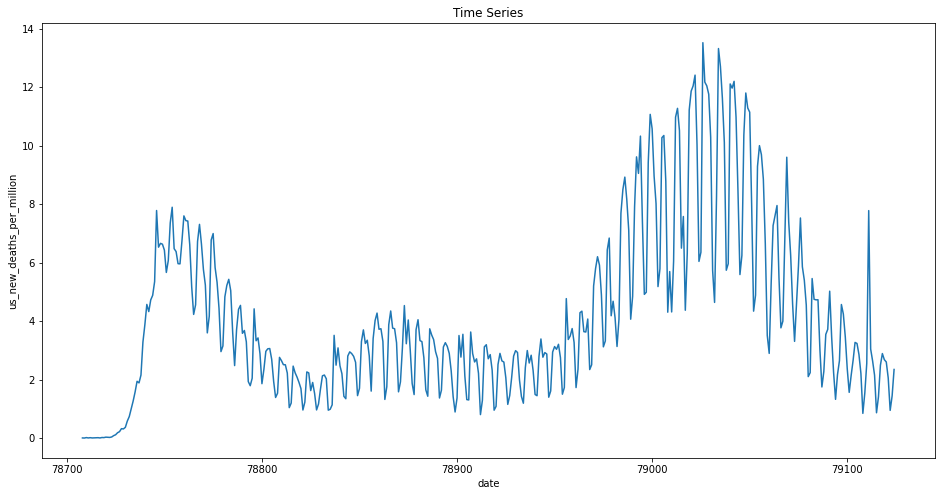

In [195]:
us_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_deaths_per_million")

France

In [196]:
country = "France"

include_fr = train[train['location'].values == country] 
exclude_fr = train[train['location'].values != country]
fr_cov19 = include_fr
fr_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
27102,FRA,Europe,France,2020-01-24,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,24012020
27103,FRA,Europe,France,2020-01-25,3.0,1.0,NaN,NaN,NaN,NaN,0.044,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,25012020
27104,FRA,Europe,France,2020-01-26,3.0,0.0,NaN,NaN,NaN,NaN,0.044,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,26012020
27105,FRA,Europe,France,2020-01-27,3.0,0.0,NaN,NaN,NaN,NaN,0.044,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,27012020
27106,FRA,Europe,France,2020-01-28,4.0,1.0,NaN,NaN,NaN,NaN,0.059,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,28012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27550,FRA,Europe,France,2021-04-16,5285304.0,36451.0,40712.857,100563.0,331.0,337.286,77556.616,534.882,597.421,1475.663,4.857,4.949,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,419212.0,NaN,NaN,6.152,346621.0,5.086,0.098,10.2,people tested,16731266.0,12315881.0,4415385.0,478706.0,368867.0,24.55,18.07,6.48,5413.0,78.70,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,16042021
27551,FRA,Europe,France,2021-04-17,5321176.0,35872.0,45641.571,100752.0,189.0,362.714,78083.002,526.386,669.745,1478.436,2.773,5.322,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17014525.0,12508863.0,4505662.0,283259.0,367081.0,24.97,18.36,6.61,5387.0,78.70,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,17042021
27552,FRA,Europe,France,2021-04-18,5350521.0,29345.0,32990.857,100892.0,140.0,283.286,78513.611,430.609,484.108,1480.490,2.054,4.157,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17102592.0,12561498.0,4541094.0,88067.0,366554.0,25.10,18

Text(0, 0.5, 'france_new_cases_per_million')

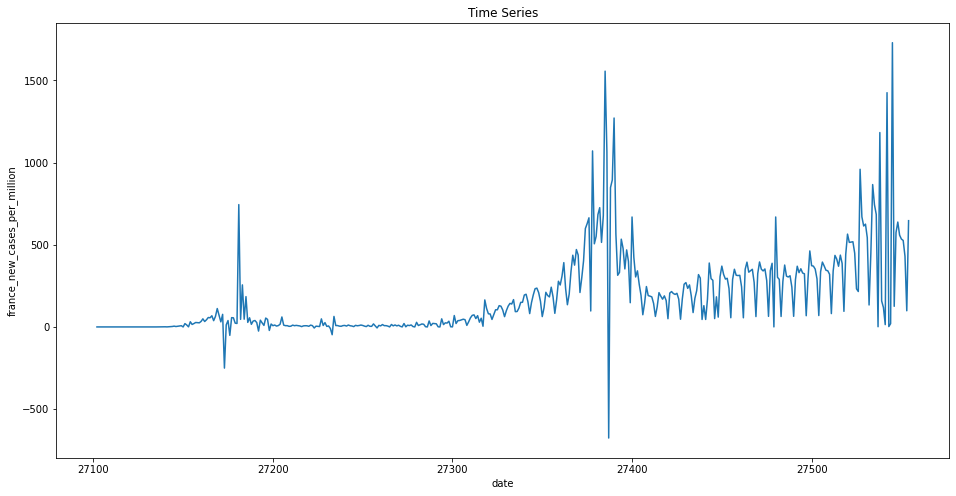

In [197]:
fr_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("france_new_cases_per_million")

Text(0, 0.5, 'france_new_deaths_per_million')

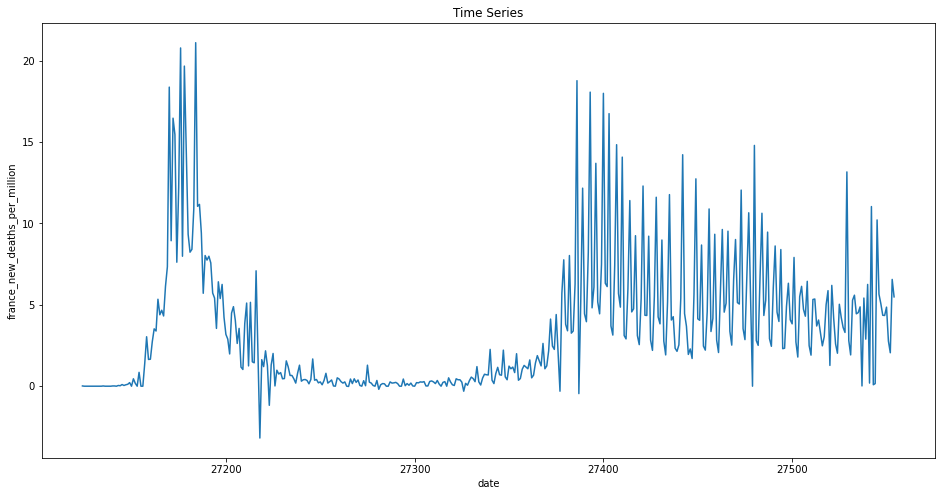

In [198]:
fr_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("france_new_deaths_per_million")

Italy

In [199]:
country = "Italy"

include_it = train[train['location'].values == country] 
exclude_it = train[train['location'].values != country]
it_cov19 = include_it
it_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
37195,ITA,Europe,Italy,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.033,0.033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,31012020
37196,ITA,Europe,Italy,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.033,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,01022020
37197,ITA,Europe,Italy,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.033,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,02022020
37198,ITA,Europe,Italy,2020-02-03,2.0,0.0,NaN,NaN,NaN,NaN,0.033,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,03022020
37199,ITA,Europe,Italy,2020-02-04,2.0,0.0,NaN,NaN,NaN,NaN,0.033,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,04022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37636,ITA,Europe,Italy,2021-04-16,3842079.0,15923.0,15079.000,116366.0,429.0,398.143,63545.532,263.356,249.397,1924.619,7.095,6.585,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327704.0,54532594.0,901.934,5.420,295099.0,4.881,0.051,19.6,tests performed,14707807.0,10360793.0,4347014.0,369678.0,297416.0,24.33,17.14,7.19,4919.0,78.70,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,16042021
37637,ITA,Europe,Italy,2021-04-17,3857443.0,15364.0,14766.571,116676.0,310.0,393.286,63799.642,254.111,244.230,1929.746,5.127,6.505,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331734.0,54864328.0,907.421,5.487,294652.0,4.873,0.050,20.0,tests performed,15055095.0,10627108.0,4427987.0,347288.0,302144.0,24.90,17.58,7.32,4997.0,NaN,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,17042021
37638,ITA,Europe,Italy,2021-04-18,3870131.0,12688.0,14331.000,116927.0,251.0,381.857,64009.494,209.851,237.026,1933.898,4.151,6.316,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230116.0,55094444.0,911.227,3.806,2913

Text(0, 0.5, 'italy_new_cases_per_million')

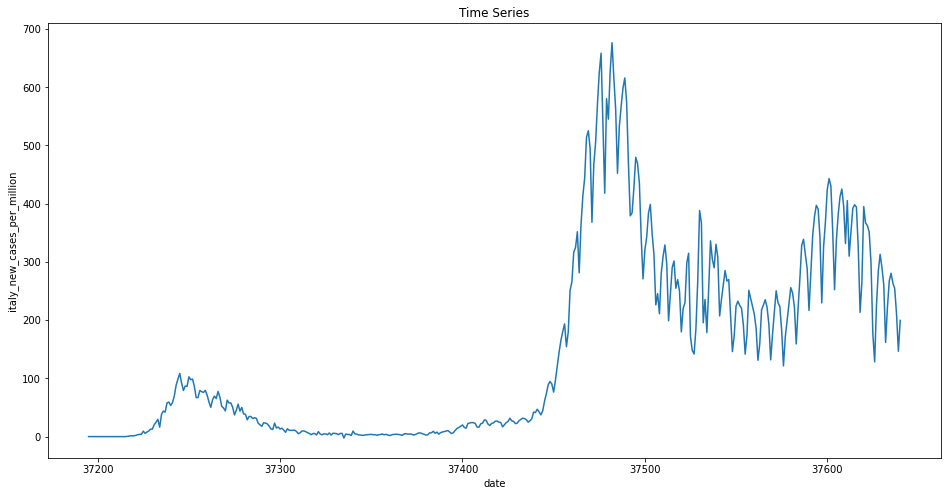

In [200]:
it_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("italy_new_cases_per_million")

Text(0, 0.5, 'italy_new_deaths_per_million')

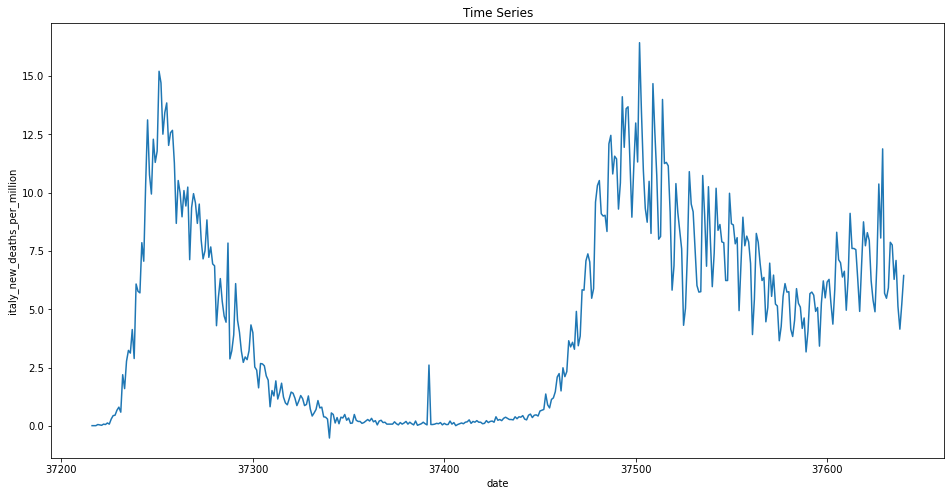

In [201]:
it_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("italy_new_deaths_per_million")

Brazil

In [202]:
country = "Brazil"

include_br = train[train['location'].values == country] 
exclude_br = train[train['location'].values != country]
br_cov19 = include_br
br_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
10625,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,26022020
10626,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,27022020
10627,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,28022020
10628,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,29022020
10629,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,01032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11040,BRA,South America,Brazil,2021-04-16,13832455.0,85774.0,65611.571,368749.0,3305.0,2861.571,65075.713,403.530,308.674,1734.804,15.549,13.462,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,941458.0,NaN,NaN,NaN,4429.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,16042021
11041,BRA,South America,Brazil,2021-04-17,13900091.0,67636.0,65012.143,371678.0,2929.0,2906.286,65393.911,318.198,305.854,1748.584,13.780,13.673,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,869635.0,NaN,NaN,NaN,4091.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,17042021
11042,BRA,South America,Brazil,2021-04-18,13943071.0,42980.0,65864.000,373335.0,1657.0,2885.429,65596.113,202.202,309.862,1756.380,7.795,13.575,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32947066.0,24350046.0,8597020.0,NaN,886544.0,15.50,11.46,4.04,4171.0,NaN,212559409.0,25.04,33.5,8.5

Text(0, 0.5, 'brazil_new_cases_per_million')

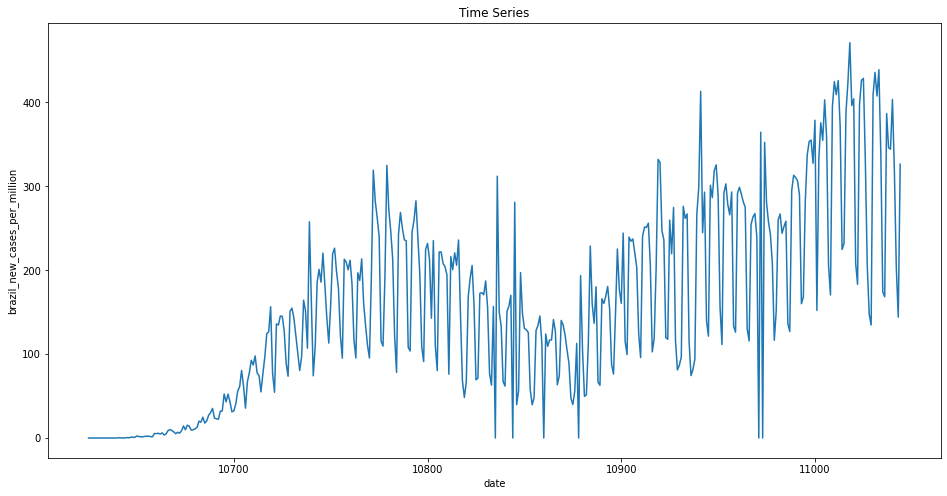

In [203]:
br_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("brazil_new_cases_per_million")

Text(0, 0.5, 'brazil_new_deaths_per_million')

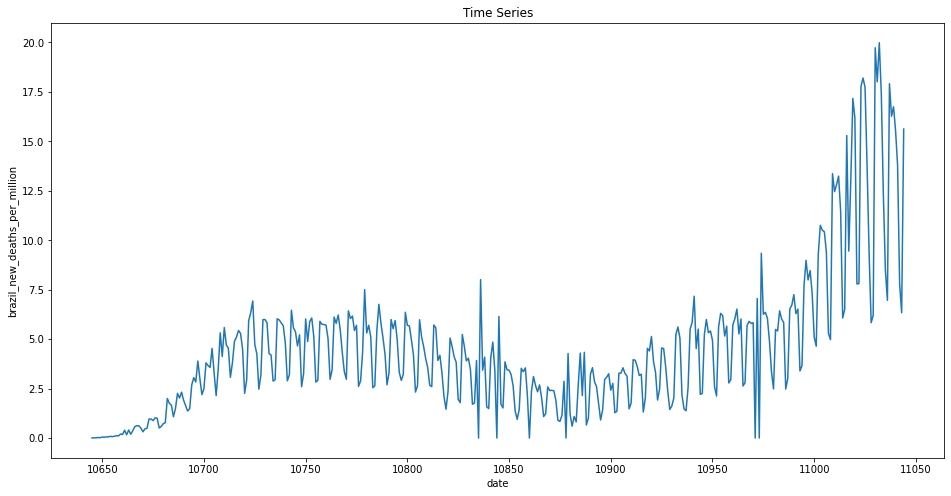

In [204]:
br_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("brazil_new_deaths_per_million")

Portugal

In [205]:
country = "Portugal"

include_p = train[train['location'].values == country]
exclude_p = train[train['location'].values != country]
p_cov19 = include_p
p_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
60248,PRT,Europe,Portugal,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.904,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,02022020
60249,PRT,Europe,Portugal,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.904,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,09022020
60250,PRT,Europe,Portugal,2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.846,1.554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,15022020
60251,PRT,Europe,Portugal,2020-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.807,1.943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,23022020
60252,PRT,Europe,Portugal,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.721,2.817,NaN,25.0,0.002,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,01032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60663,PRT,Europe,Portugal,2021-04-16,829911.0,553.0,512.000,16937.0,4.0,4.714,81390.100,54.233,50.212,1661.026,0.392,0.462,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45774.0,9740983.0,955.307,4.489,36304.0,3.560,0.014,70.9,tests performed,2429486.0,1772322.0,657164.0,69644.0,44492.0,23.83,17.38,6.44,4363.0,NaN,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,16042021
60664,PRT,Europe,Portugal,2021-04-17,830560.0,649.0,518.857,16942.0,5.0,4.571,81453.748,63.648,50.885,1661.517,0.490,0.448,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30096.0,9771079.0,958.258,2.952,36061.0,3.537,0.014,69.5,tests performed,2497281.0,1820162.0,677119.0,67795.0,44240.0,24.49,17.85,6.64,4339.0,NaN,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,17042021
60665,PRT,Europe,Portugal,2021-04-18,831001.0,441.0,501.000,16945.0,3.0,4.143,81496.997,43.249,49.134,1661.811,0.294,0.406,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2616099

Text(0, 0.5, 'portugal_new_cases_per_million')

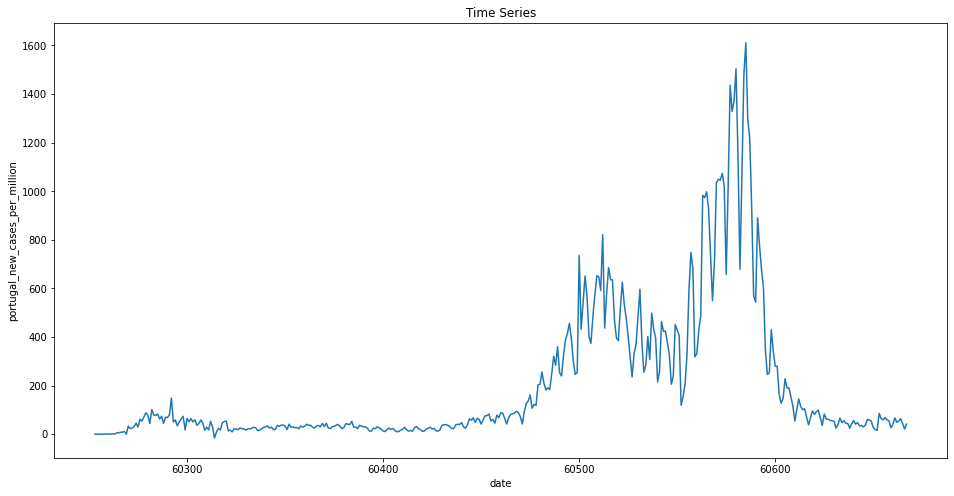

In [206]:
p_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("portugal_new_cases_per_million")

Text(0, 0.5, 'portugal_new_deaths_per_million')

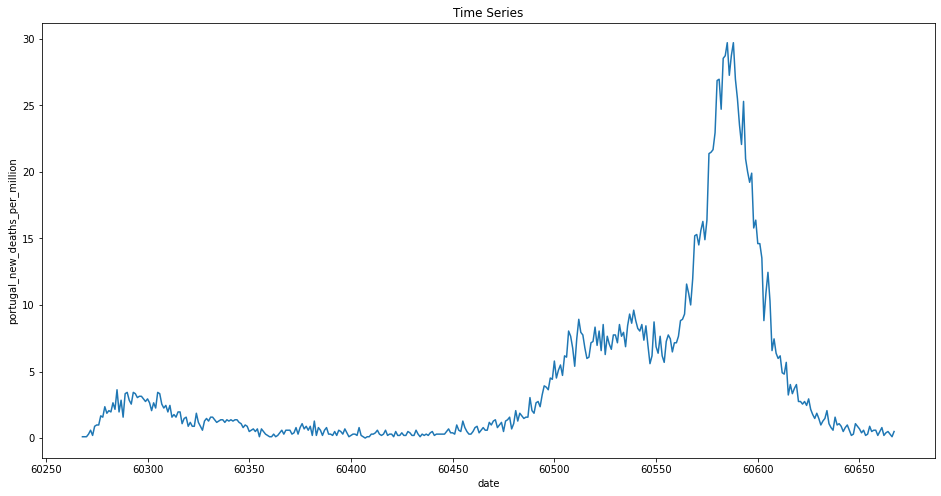

In [207]:
p_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("portugal_new_deaths_per_million")

Spain

In [208]:
country = "Spain"

include_sp = train[train['location'].values == country]
exclude_sp = train[train['location'].values != country]
sp_cov19 = include_sp
sp_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
70199,ESP,Europe,Spain,2020-02-01,1.0,1.0,NaN,NaN,NaN,NaN,0.021,0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,01022020
70200,ESP,Europe,Spain,2020-02-02,1.0,0.0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.963,0.063,18.768,0.401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,02022020
70201,ESP,Europe,Spain,2020-02-03,1.0,0.0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,03022020
70202,ESP,Europe,Spain,2020-02-04,1.0,0.0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,04022020
70203,ESP,Europe,Spain,2020-02-05,1.0,0.0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,05022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70639,ESP,Europe,Spain,2021-04-16,3407283.0,10598.0,8538.714,76981.0,99.0,93.286,72875.603,226.672,182.628,1646.484,2.117,1.995,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12330755.0,9002054.0,3328701.0,445670.0,299847.0,26.37,19.25,7.12,6413.0,67.59,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,16042021
70640,ESP,Europe,Spain,2021-04-17,3407283.0,0.0,8538.714,76981.0,0.0,93.286,72875.603,0.000,182.628,1646.484,0.000,1.995,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,298403.0,NaN,NaN,NaN,6382.0,67.59,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,17042021
70641,ESP,Europe,Spain,2021-04-18,3407283.0,0.0,8538.714,76981.0,0.0,93.286,72875.603,0.000,182.628,1646.484,0.000,1.995,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296959.0,NaN,NaN,NaN,6351.0,67.59,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904

Text(0, 0.5, 'spain_new_cases_per_million')

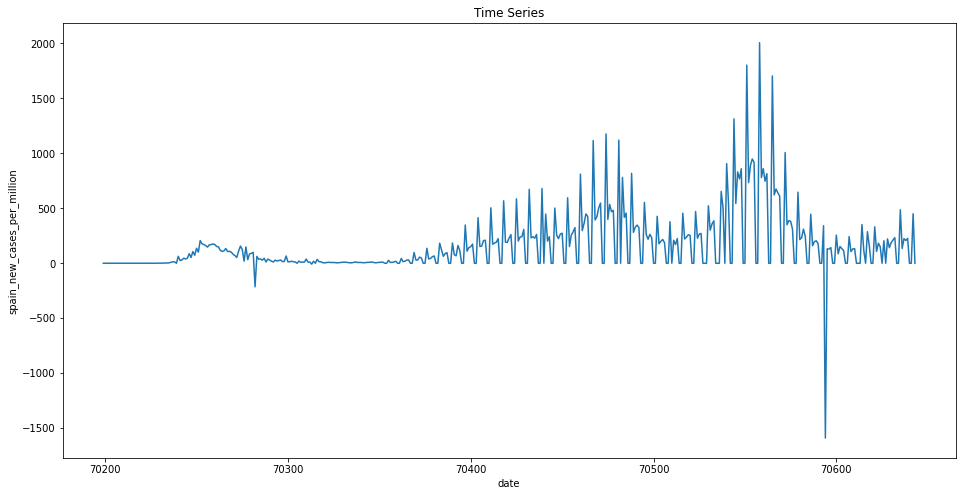

In [209]:
sp_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("spain_new_cases_per_million")

Text(0, 0.5, 'spain_new_deaths_per_million')

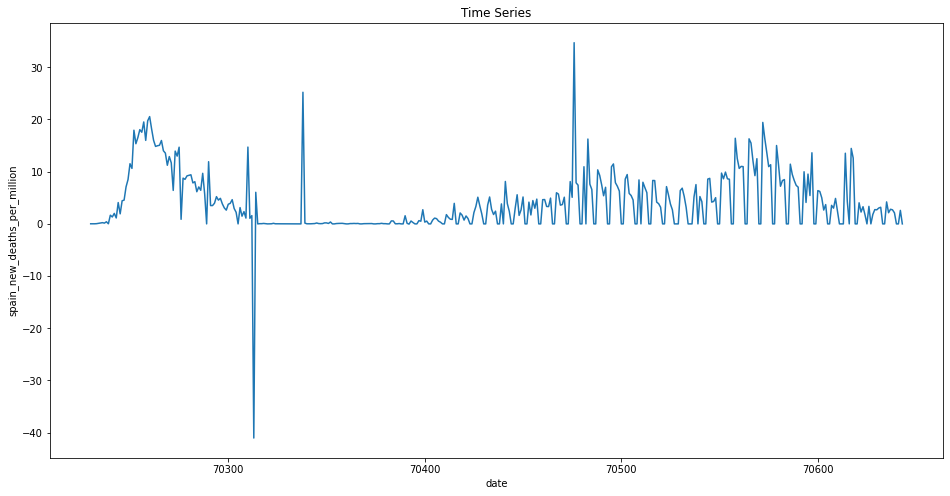

In [210]:
sp_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("spain_new_deaths_per_million")

India

In [211]:
country = "India"

include_i = train[train['location'].values == country]
exclude_i = train[train['location'].values != country]
i_cov19 = include_i
i_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
34112,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,30012020
34113,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,31012020
34114,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,01022020
34115,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,02022020
34116,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,03022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34554,IND,Asia,India,2021-04-16,14526609.0,234692.0,188669.000,175649.0,1341.0,1030.429,10526.495,170.066,136.716,127.281,0.972,0.747,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1473210.0,263476625.0,190.924,1.068,1347863.0,0.977,0.140,7.1,samples tested,119937641.0,104408484.0,15529157.0,2714132.0,3123212.0,8.69,7.57,1.13,2263.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,16042021
34555,IND,Asia,India,2021-04-17,14788003.0,261394.0,204171.143,177150.0,1501.0,1125.000,10715.910,189.415,147.950,128.369,1.088,0.815,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1495397.0,264972022.0,192.008,1.084,1393888.0,1.010,0.146,6.8,samples tested,122622590.0,106431076.0,16191514.0,2684949.0,3003920.0,8.89,7.71,1.17,2177.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,17042021
34556,IND,Asia,India,2021-04-18,15061805.0,273802.0,219155.429,178769.0,1619.0,1227.143,10914.317,198.407,158.808,129.542,1.173,0.889,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1566394.0,266538416.0,

Text(0, 0.5, 'us_new_cases_per_million')

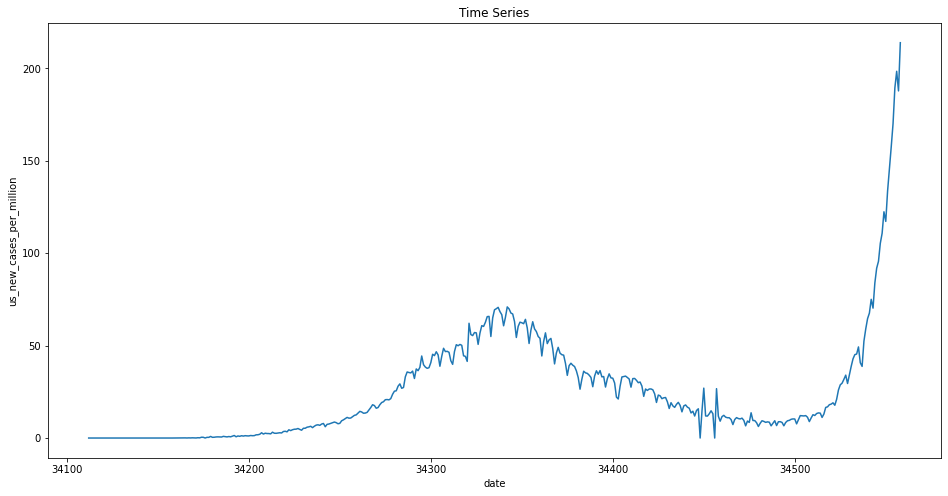

In [212]:
i_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_cases_per_million")

Text(0, 0.5, 'us_new_deaths_per_million')

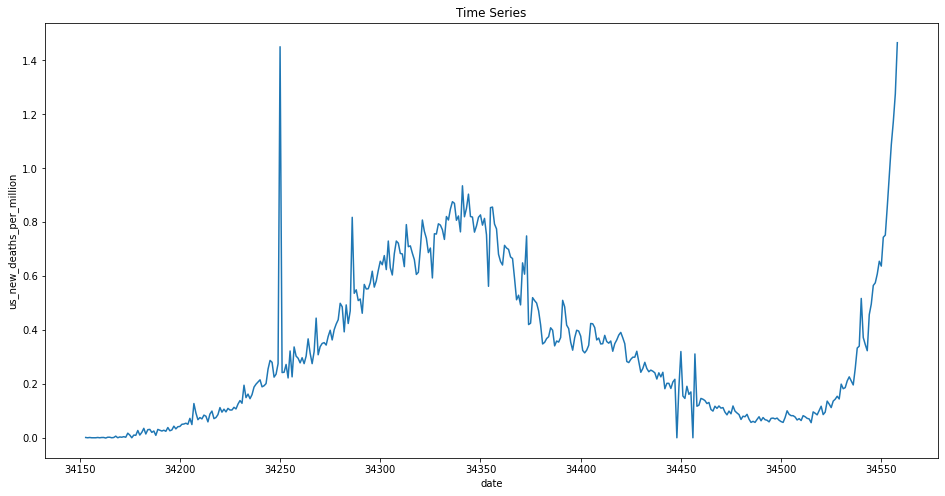

In [213]:
i_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_deaths_per_million")

China

In [214]:
country = "China"

include_c = train[train['location'].values == country]
exclude_c = train[train['location'].values != country]
c_cov19 = include_c
c_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
15703,CHN,Asia,China,2020-01-22,548.0,NaN,NaN,17.0,NaN,NaN,0.381,NaN,NaN,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.39,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,22012020
15704,CHN,Asia,China,2020-01-23,643.0,95.0,NaN,18.0,1.0,NaN,0.447,0.066,NaN,0.013,0.001,NaN,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,23012020
15705,CHN,Asia,China,2020-01-24,920.0,277.0,NaN,26.0,8.0,NaN,0.639,0.192,NaN,0.018,0.006,NaN,3.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,24012020
15706,CHN,Asia,China,2020-01-25,1406.0,486.0,NaN,42.0,16.0,NaN,0.977,0.338,NaN,0.029,0.011,NaN,3.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.69,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,25012020
15707,CHN,Asia,China,2020-01-26,2075.0,669.0,NaN,56.0,14.0,NaN,1.442,0.465,NaN,0.039,0.010,NaN,3.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,26012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16153,CHN,Asia,China,2021-04-16,102167.0,32.0,22.143,4845.0,0.0,0.286,70.983,0.022,0.015,3.366,0.000,0.0,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187360000.0,NaN,NaN,3824000.0,3748429.0,13.02,NaN,NaN,2604.0,78.24,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,16042021
16154,CHN,Asia,China,2021-04-17,102201.0,34.0,24.857,4845.0,0.0,0.286,71.006,0.024,0.017,3.366,0.000,0.0,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189809000.0,NaN,NaN,2449000.0,3619714.0,13.19,NaN,NaN,2515.0,78.24,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,17042021
16155,CHN,Asia,China,2021-04-18,102242.0,41.0,26.571,4845.0,0.0,0.286,71.035,0.028,0.018,3.366,0.000,0.0,1.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192127000.0,NaN,NaN,2318000.0,3540571.0,13.35,NaN,NaN,2460.0,78.24,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,Na

Text(0, 0.5, 'china_new_cases_per_million')

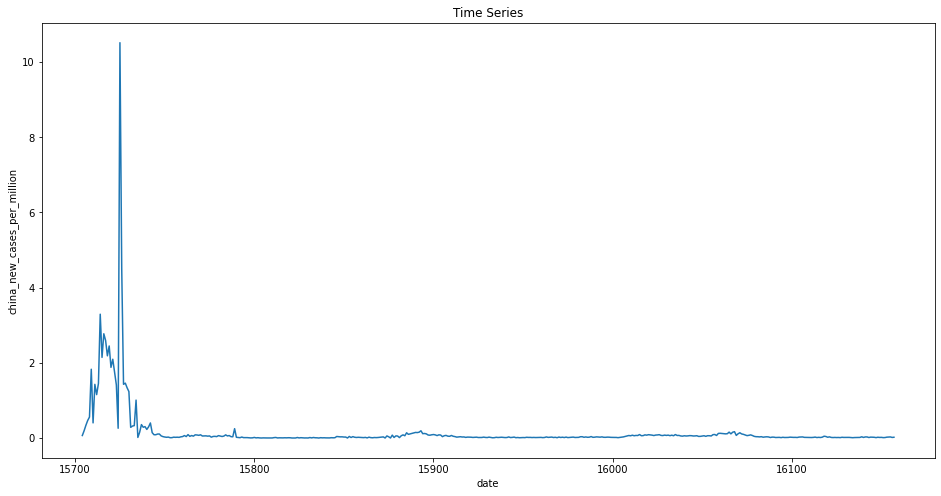

In [215]:
c_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("china_new_cases_per_million")

Text(0, 0.5, 'china_new_deaths_per_million')

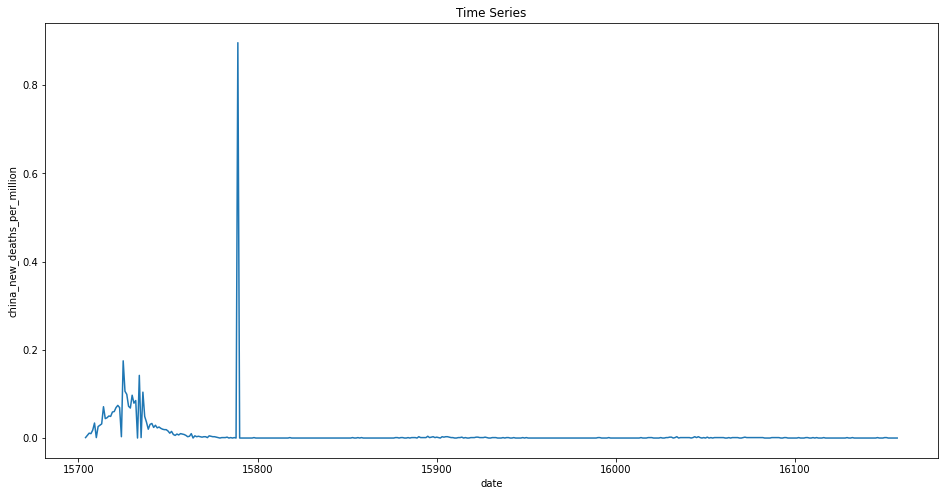

In [216]:
c_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("china_new_deaths_per_million")

Taiwan

In [217]:
country = "Taiwan"

include_t = train[train['location'].values == country]
exclude_t = train[train['location'].values != country]
t_cov19 = include_t
t_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
73163,TWN,Asia,Taiwan,2020-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,16012020
73164,TWN,Asia,Taiwan,2020-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,17012020
73165,TWN,Asia,Taiwan,2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,18012020
73166,TWN,Asia,Taiwan,2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,19012020
73167,TWN,Asia,Taiwan,2020-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,8.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,20012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73619,TWN,Asia,Taiwan,2021-04-16,1070.0,2.0,2.286,11.0,0.0,0.143,44.926,0.084,0.096,0.462,0.0,0.006,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549.0,198710.0,8.343,0.023,480.0,0.020,0.005,210.0,people tested,32389.0,32389.0,NaN,2350.0,1134.0,0.14,0.14,NaN,48.0,25.00,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,16042021
73620,TWN,Asia,Taiwan,2021-04-17,1072.0,2.0,2.286,11.0,0.0,0.143,45.010,0.084,0.096,0.462,0.0,0.006,0.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.0,198850.0,8.349,0.006,467.0,0.020,0.005,204.3,people tested,32450.0,NaN,NaN,61.0,1113.0,0.14,NaN,NaN,47.0,25.00,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,17042021
73621,TWN,Asia,Taiwan,2021-04-18,1073.0,1.0,2.286,11.0,0.0,0.000,45.052,0.042,0.096,0.462,0.0,0.000,0.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.0,198978.0,8.355,0.005,462.0,0.019,0.005,202.1,people tested,NaN,NaN,NaN,NaN,1190.0,NaN,NaN,NaN,50.0,25.00,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,18042021
73622,TWN,Asia,Taiwan,2021-04-19,1076.0,3.0,2.571,11.0,0.0,0.000,45.178,0.126,0.108,0.462,0.0,0.000,NaN

Text(0, 0.5, 'taiwan_new_cases_per_million')

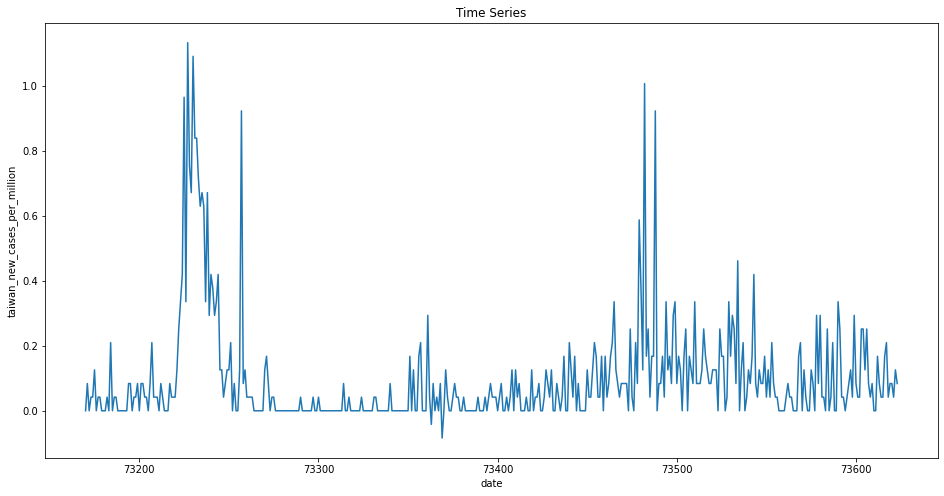

In [218]:
t_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("taiwan_new_cases_per_million")

Text(0, 0.5, 'taiwan_new_deaths_per_million')

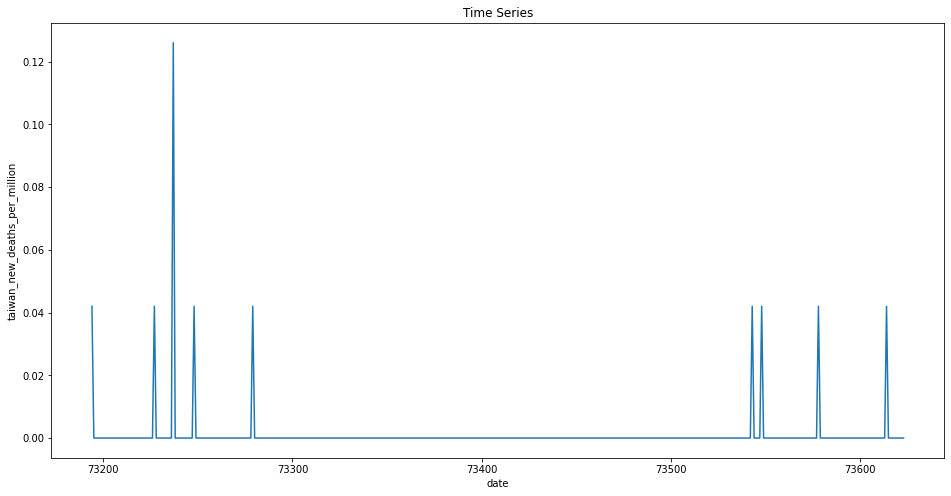

In [219]:
t_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("taiwan_new_deaths_per_million")

Japan

In [220]:
country = "Japan"

include_j = train[train['location'].values == country]
exclude_j = train[train['location'].values != country]
j_cov19 = include_j
j_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
38047,JPN,Asia,Japan,2020-01-22,2.0,NaN,NaN,NaN,NaN,NaN,0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,22012020
38048,JPN,Asia,Japan,2020-01-23,2.0,0.0,NaN,NaN,NaN,NaN,0.016,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,23012020
38049,JPN,Asia,Japan,2020-01-24,2.0,0.0,NaN,NaN,NaN,NaN,0.016,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,24012020
38050,JPN,Asia,Japan,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.016,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,25012020
38051,JPN,Asia,Japan,2020-01-26,4.0,2.0,NaN,NaN,NaN,NaN,0.032,0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,26012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38497,JPN,Asia,Japan,2021-04-16,526307.0,4511.0,3782.286,9552.0,46.0,32.429,4161.304,35.667,29.905,75.524,0.364,0.256,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77966.0,10215135.0,80.767,0.616,62045.0,0.491,0.061,16.4,people tested,NaN,NaN,NaN,NaN,40953.0,NaN,NaN,NaN,324.0,NaN,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,16042021
38498,JPN,Asia,Japan,2021-04-17,531109.0,4802.0,3938.857,9593.0,41.0,34.429,4199.272,37.968,31.143,75.848,0.324,0.272,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50503.0,10265638.0,81.166,0.399,63414.0,0.501,0.062,16.1,people tested,NaN,NaN,NaN,NaN,39920.0,NaN,NaN,NaN,316.0,NaN,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,17042021
38499,JPN,Asia,Japan,2021-04-18,535220.0,4111.0,4140.429,9610.0,17.0,34.429,4231.776,32.504,32.737,75.983,0.134,0.272,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30571.0,10296209.0,81.408,0.242,64571.0,0.511,0.064,15.6,people tested,1930111.0,1211715.0,718396.0,NaN,38887.0,1.53,0.96,0.57,307.0,NaN,126476458.0,347.778,48.2,27.049,

Text(0, 0.5, 'japan_new_cases_per_million')

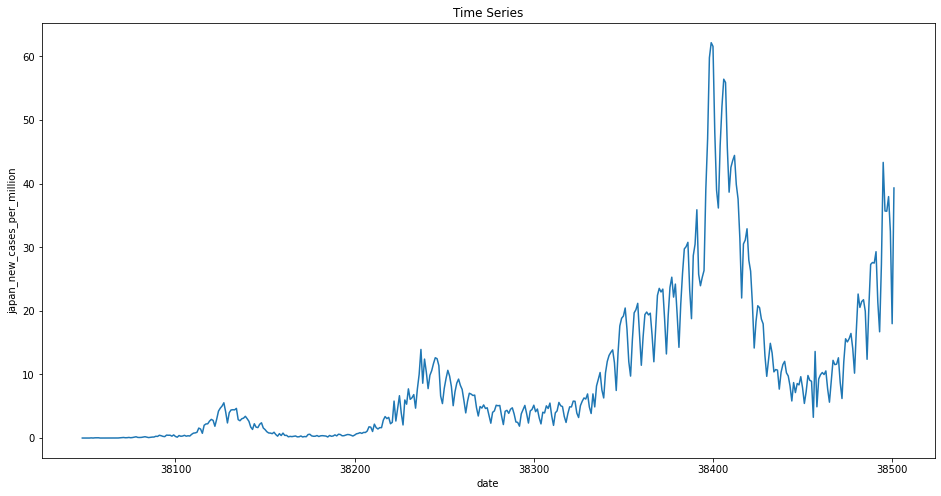

In [221]:
j_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("japan_new_cases_per_million")

Text(0, 0.5, 'japan_new_deaths_per_million')

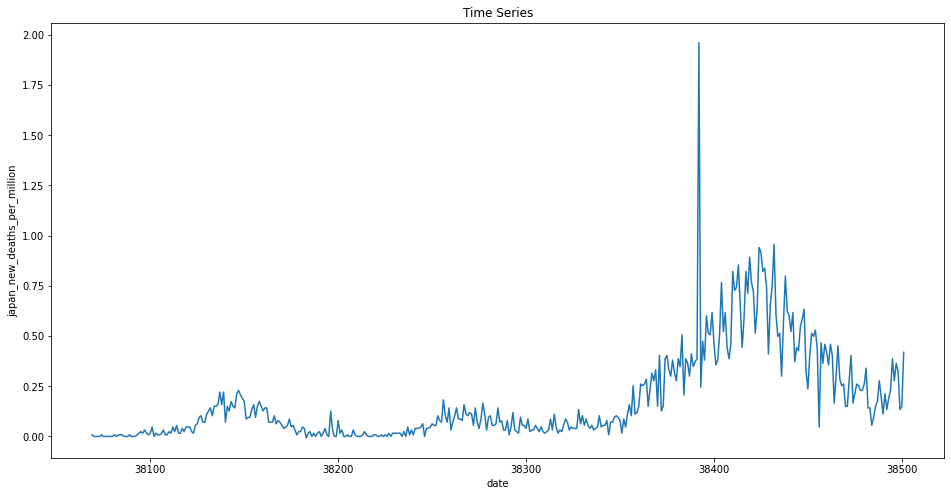

In [222]:
j_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("japan_new_deaths_per_million")

New Zealand

In [223]:
country = "New Zealand"

include_nz = train[train['location'].values == country]
exclude_nz = train[train['location'].values != country]
nz_cov19 = include_nz
nz_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
52972,NZL,Oceania,New Zealand,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,0.207,0.207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,28022020
52973,NZL,Oceania,New Zealand,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,29022020
52974,NZL,Oceania,New Zealand,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,0.047,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,01032020
52975,NZL,Oceania,New Zealand,2020-03-02,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,254.0,0.053,0.006,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,02032020
52976,NZL,Oceania,New Zealand,2020-03-03,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,280.0,0.058,0.005,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53385,NZL,Oceania,New Zealand,2021-04-16,2591.0,0.0,2.857,26.0,0.0,0.0,537.303,0.000,0.592,5.392,0.0,0.0,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4700.0,1963982.0,407.276,0.975,4466.0,0.926,0.001,1563.2,tests performed,161601.0,125505.0,36096.0,9114.0,6846.0,3.35,2.60,0.75,1420.0,22.22,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,16042021
53386,NZL,Oceania,New Zealand,2021-04-17,2595.0,4.0,3.000,26.0,0.0,0.0,538.132,0.829,0.622,5.392,0.0,0.0,0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4250.0,0.881,0.001,1416.7,tests performed,166243.0,129035.0,37208.0,4642.0,6950.0,3.45,2.68,0.77,1441.0,22.22,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,17042021
53387,NZL,Oceania,New Zealand,2021-04-18,2596.0,1.0,1.857,26.0,0.0,0.0,538.340,0.207,0.385,5.392,0.0,0.0,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4146.0,0.860,0.000,2232.6,tests performed,168301.0,130507.0,37794.0,2058.0,673

Text(0, 0.5, 'new_zealand_new_cases_per_million')

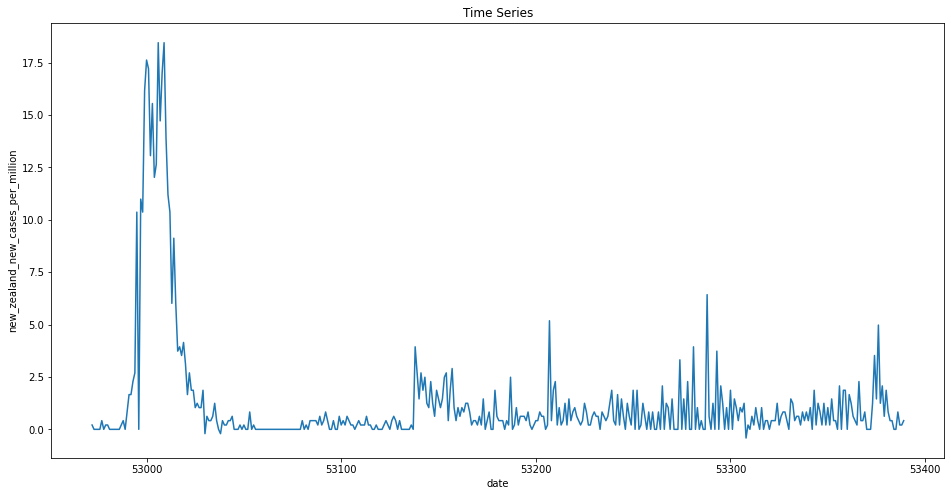

In [224]:
nz_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("new_zealand_new_cases_per_million")

Text(0, 0.5, 'new_zealand_new_deaths_per_million')

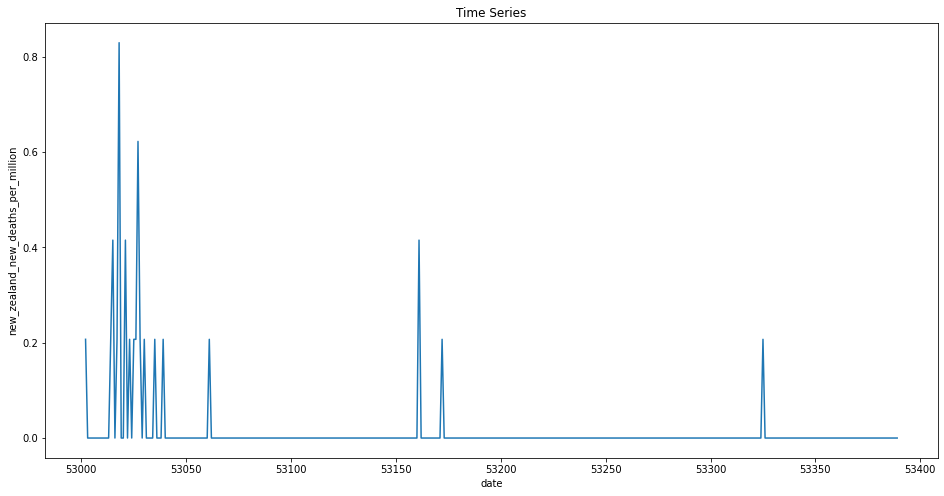

In [225]:
nz_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("new_zealand_new_deaths_per_million")

Australia

In [226]:
country = "Australia"

include_a = train[train['location'].values == country]
exclude_a = train[train['location'].values != country]
a_cov19 = include_a
a_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
4329,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,NaN,NaN,0.157,0.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,26012020
4330,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,NaN,NaN,0.196,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,27012020
4331,AUS,Oceania,Australia,2020-01-28,5.0,0.0,NaN,NaN,NaN,NaN,0.196,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,28012020
4332,AUS,Oceania,Australia,2020-01-29,6.0,1.0,NaN,NaN,NaN,NaN,0.235,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,29012020
4333,AUS,Oceania,Australia,2020-01-30,9.0,3.0,NaN,NaN,NaN,NaN,0.353,0.118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,30012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4775,AUS,Oceania,Australia,2021-04-16,29499.0,15.0,14.714,910.0,0.0,0.143,1156.829,0.588,0.577,35.686,0.0,0.006,1.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36988.0,1.451,0.000,2513.8,tests performed,1420577.0,NaN,NaN,60912.0,49009.0,5.57,NaN,NaN,1922.0,44.91,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,16042021
4776,AUS,Oceania,Australia,2021-04-17,29519.0,20.0,16.286,910.0,0.0,0.143,1157.613,0.784,0.639,35.686,0.0,0.006,1.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35914.0,1.408,0.000,2205.2,tests performed,1474558.0,NaN,NaN,53981.0,47956.0,5.78,NaN,NaN,1881.0,44.91,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,17042021
4777,AUS,Oceania,Australia,2021-04-18,29533.0,14.0,16.286,910.0,0.0,0.143,1158.162,0.549,0.639,35.686,0.0,0.006,1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16357455.0,641.472,NaN,34841.0,1.366,0.000,2139.3,tests performed,1496912.0,NaN,NaN,22354.0,47192.0,5.87,NaN,NaN,1851.0,44.91,25499881.0,3.202,37.9,15.504,10.12

Text(0, 0.5, 'australia_new_cases_per_million')

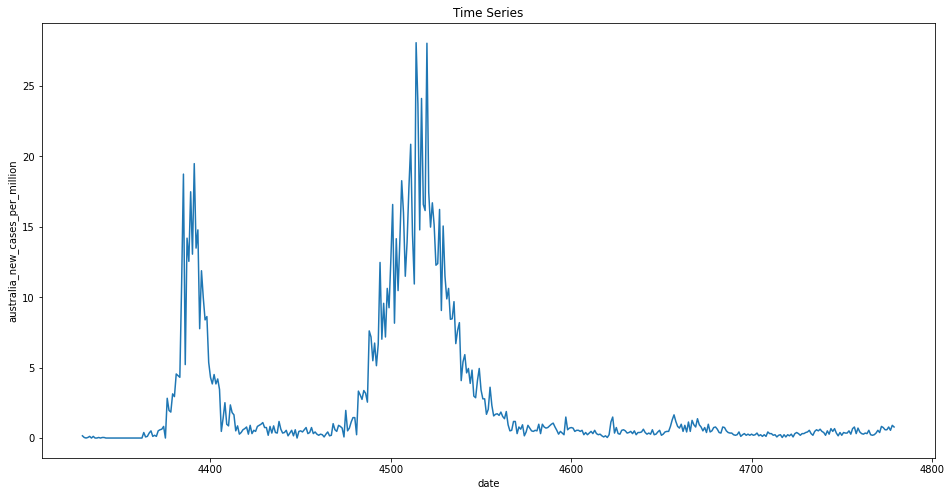

In [227]:
a_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("australia_new_cases_per_million")

Text(0, 0.5, 'australia_new_deaths_per_million')

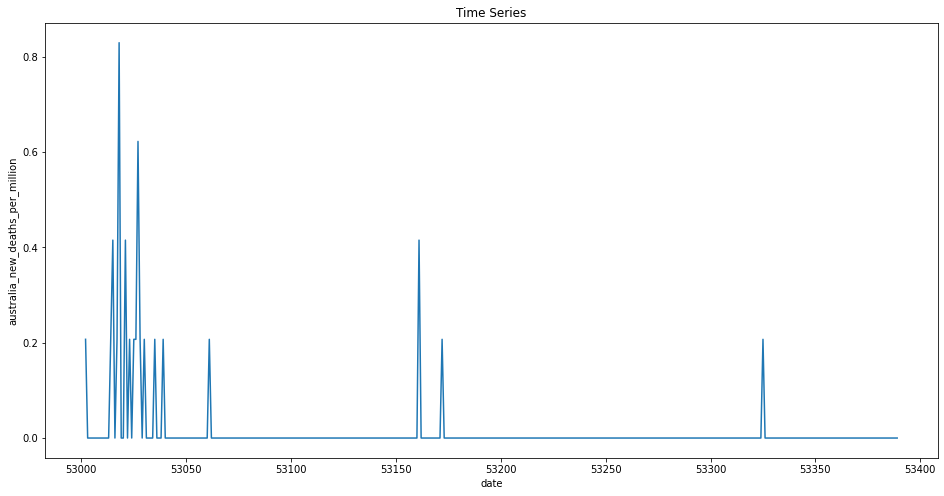

In [228]:
nz_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("australia_new_deaths_per_million")

South Africa

In [229]:
country = "South Africa"

include_sa = train[train['location'].values == country]
exclude_sa = train[train['location'].values != country]
sa_cov19 = include_sa
sa_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
68499,ZAF,Africa,South Africa,2020-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,07022020
68500,ZAF,Africa,South Africa,2020-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,08022020
68501,ZAF,Africa,South Africa,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,09022020
68502,ZAF,Africa,South Africa,2020-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,10022020
68503,ZAF,Africa,South Africa,2020-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,11022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68933,ZAF,Africa,South Africa,2021-04-16,1564355.0,1424.0,1159.000,53663.0,92.0,62.429,26376.489,24.010,19.542,904.808,1.551,1.053,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31600.0,10291264.0,173.520,0.533,29258.0,0.493,0.040,25.2,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,16042021
68934,ZAF,Africa,South Africa,2021-04-17,1565680.0,1325.0,1164.714,53711.0,48.0,65.000,26398.830,22.341,19.638,905.618,0.809,1.096,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14377.0,10305641.0,173.763,0.242,27103.0,0.457,0.043,23.3,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,17042021
68935,ZAF,Africa,South Africa,2021-04-18,1566769.0,1089.0,1187.286,53736.0,25.0,59.143,26417.191,18.362,20.019,906.039,0.422,0.997,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31425.0,10337066.0,174.293,0.530,28304.0,0.477,0.042,23.8,peo

Text(0, 0.5, 'sa_new_cases_per_million')

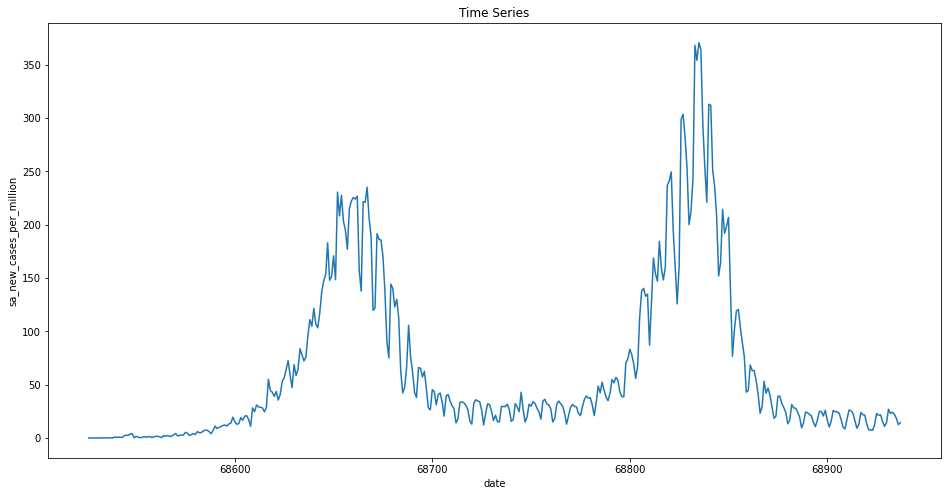

In [230]:
sa_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sa_new_cases_per_million")

Text(0, 0.5, 'sa_new_deaths_per_million')

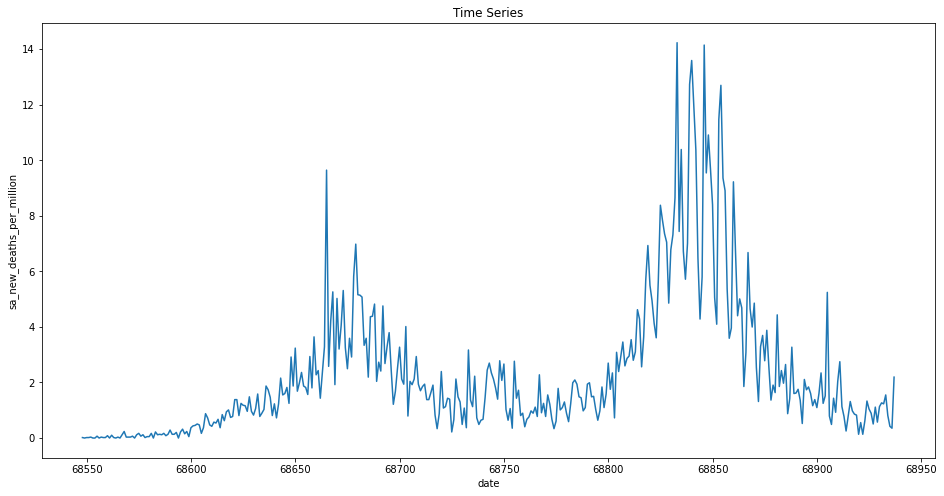

In [231]:
sa_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sa_new_deaths_per_million")

Nigeria

In [232]:
country = "Nigeria"

include_n = train[train['location'].values == country]
exclude_n = train[train['location'].values != country]
n_cov19 = include_n
n_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
54185,NGA,Africa,Nigeria,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,28022020
54186,NGA,Africa,Nigeria,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,29022020
54187,NGA,Africa,Nigeria,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,01032020
54188,NGA,Africa,Nigeria,2020-03-02,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,02032020
54189,NGA,Africa,Nigeria,2020-03-03,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54598,NGA,Africa,Nigeria,2021-04-16,164147.0,67.0,70.714,2061.0,0.0,0.286,796.291,0.325,0.343,9.998,0.0,0.001,0.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4815.0,0.023,0.015,68.1,samples tested,1081548.0,1081548.0,NaN,30452.0,12486.0,0.52,0.52,NaN,61.0,NaN,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,16042021
54599,NGA,Africa,Nigeria,2021-04-17,164207.0,60.0,67.286,2061.0,0.0,0.143,796.582,0.291,0.326,9.998,0.0,0.001,0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4769.0,0.023,0.014,70.9,samples tested,NaN,NaN,NaN,NaN,12154.0,NaN,NaN,NaN,59.0,NaN,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,17042021
54600,NGA,Africa,Nigeria,2021-04-18,164233.0,26.0,62.000,2061.0,0.0,0.143,796.708,0.126,0.301,9.998,0.0,0.001,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4723.0,0.023,0.013,76.2,samples tested,1096727.0,1096727.0,NaN,NaN,11821.0,0.53,0.53,NaN,57.0,NaN,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,

Text(0, 0.5, 'n_new_cases_per_million')

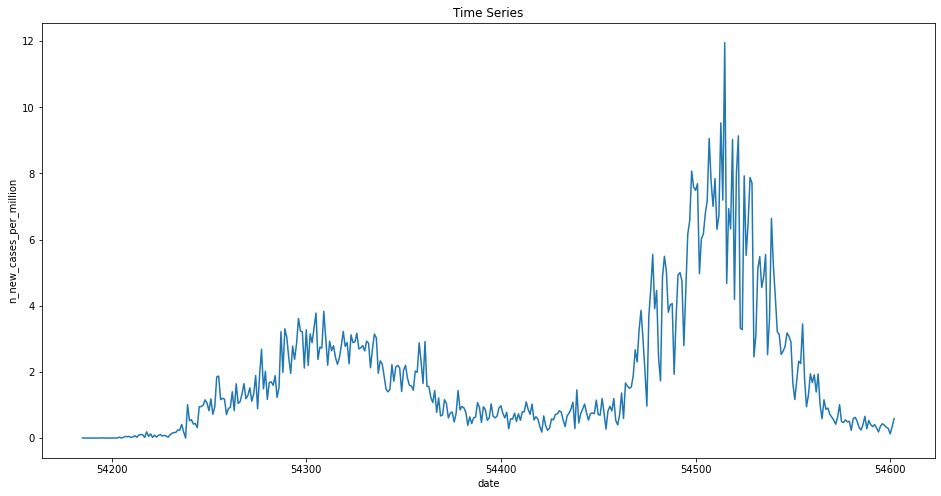

In [233]:
n_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("n_new_cases_per_million")

Text(0, 0.5, 'n_new_deaths_per_million')

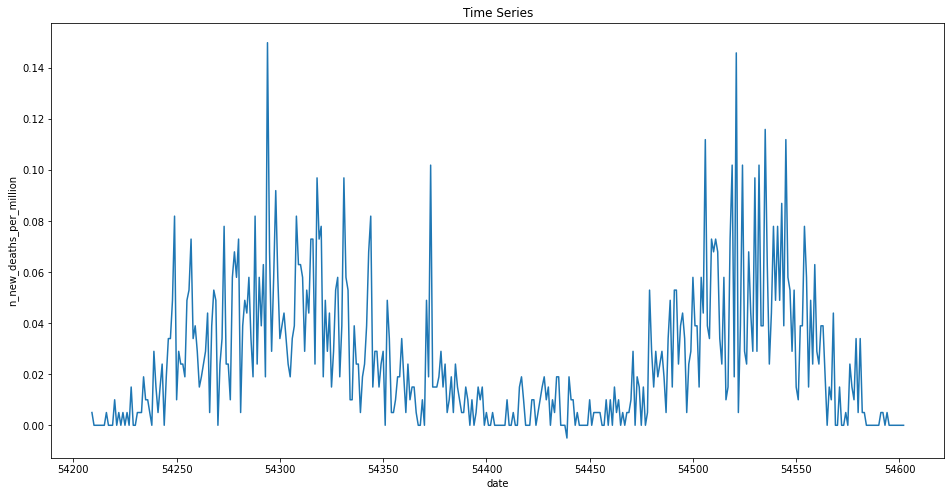

In [234]:
n_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("n_new_deaths_per_million")

Sweden

In [235]:
country = "Sweden"

include_s = train[train['location'].values == country]
exclude_s = train[train['location'].values != country]
s_cov19 = include_s
s_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
71902,SWE,Europe,Sweden,2020-02-01,1.0,1.0,NaN,NaN,NaN,NaN,0.099,0.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,01022020
71903,SWE,Europe,Sweden,2020-02-02,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,02022020
71904,SWE,Europe,Sweden,2020-02-03,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,03022020
71905,SWE,Europe,Sweden,2020-02-04,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,04022020
71906,SWE,Europe,Sweden,2020-02-05,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,05022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72342,SWE,Europe,Sweden,2021-04-16,900138.0,7658.0,6105.286,13788.0,27.0,23.857,89129.016,758.273,604.527,1365.247,2.673,2.362,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2316903.0,1667542.0,649361.0,74444.0,45692.0,22.94,16.51,6.43,4524.0,65.74,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,16042021
72343,SWE,Europe,Sweden,2021-04-17,900138.0,0.0,6105.286,13788.0,0.0,23.857,89129.016,0.000,604.527,1365.247,0.000,2.362,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50827.0,NaN,NaN,NaN,5033.0,65.74,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,17042021
72344,SWE,Europe,Sweden,2021-04-18,900138.0,0.0,6105.286,13788.0,0.0,23.857,89129.016,0.000,604.527,1365.247,0.000,2.362,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55963.0,NaN,NaN,NaN,5541.0,65.74,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,1804202

Text(0, 0.5, 'sweden_new_cases_per_million')

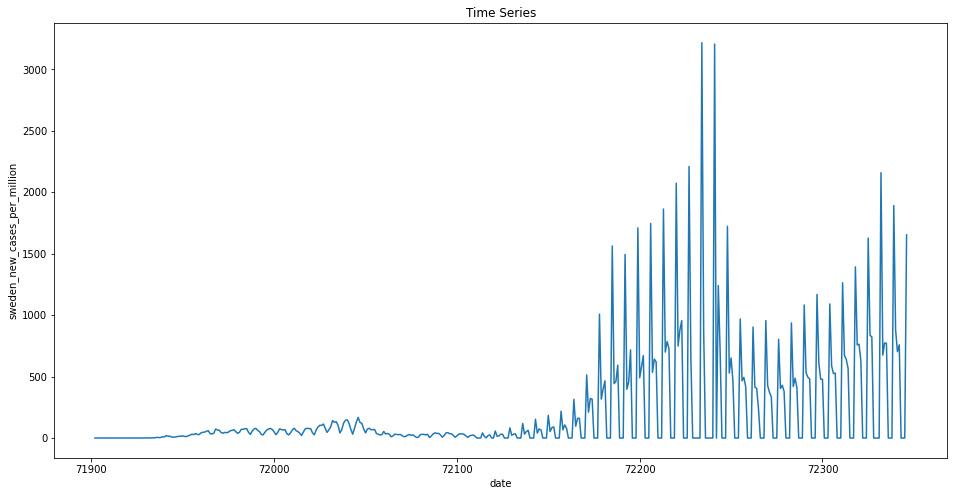

In [236]:
s_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sweden_new_cases_per_million")

Text(0, 0.5, 'sweden_new_deaths_per_million')

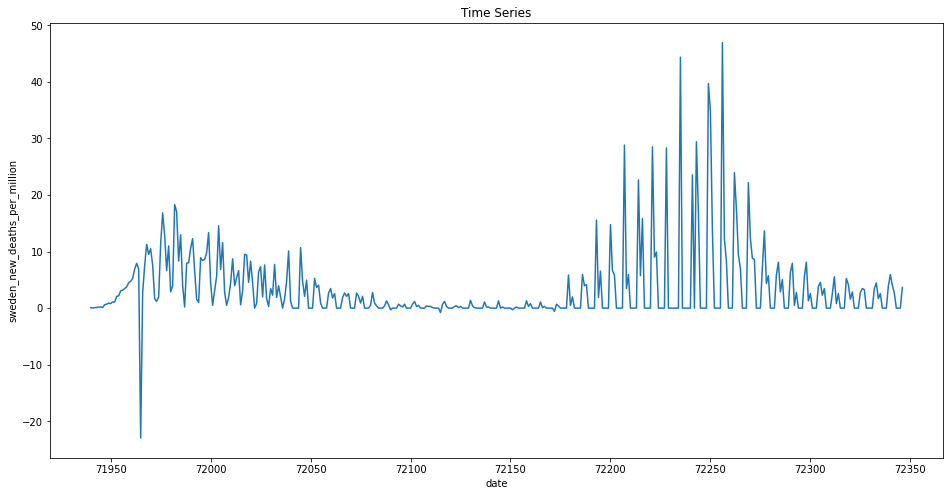

In [237]:
s_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sweden_new_deaths_per_million")

Denmark

In [238]:
country = "Denmark"

include_d = train[train['location'].values == country]
exclude_d = train[train['location'].values != country]
d_cov19 = include_d
d_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
20225,DNK,Europe,Denmark,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,02022020
20226,DNK,Europe,Denmark,2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,03022020
20227,DNK,Europe,Denmark,2020-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,04022020
20228,DNK,Europe,Denmark,2020-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,05022020
20229,DNK,Europe,Denmark,2020-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,06022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20664,DNK,Europe,Denmark,2021-04-16,241700.0,677.0,666.000,2453.0,3.0,2.286,41728.510,116.881,114.982,423.500,0.518,0.395,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1536477.0,1039679.0,496798.0,25561.0,34813.0,26.53,17.95,8.58,6010.0,64.81,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,16042021
20665,DNK,Europe,Denmark,2021-04-17,242424.0,724.0,661.571,2453.0,0.0,1.857,41853.505,124.996,114.218,423.500,0.000,0.321,1.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1558011.0,1058474.0,499537.0,21534.0,34717.0,26.90,18.27,8.62,5994.0,64.81,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,17042021
20666,DNK,Europe,Denmark,2021-04-18,243326.0,902.0,691.714,2456.0,3.0,2.000,42009.232,155.727,119.422,424.018,0.518,0.345,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1577664.0,1072967.0,504697.0,19653.0,34847.0,27.24,18.52,8.71,6016.0,64.81,5792203.0,136.52,42.3,19.677

Text(0, 0.5, 'denmark_new_cases_per_million')

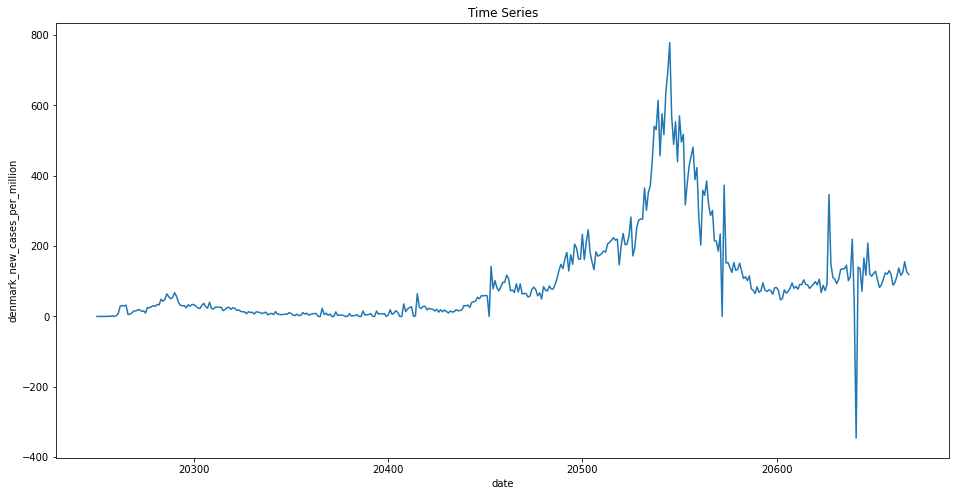

In [239]:
d_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("denmark_new_cases_per_million")

Text(0, 0.5, 'denmark_new_deaths_per_million')

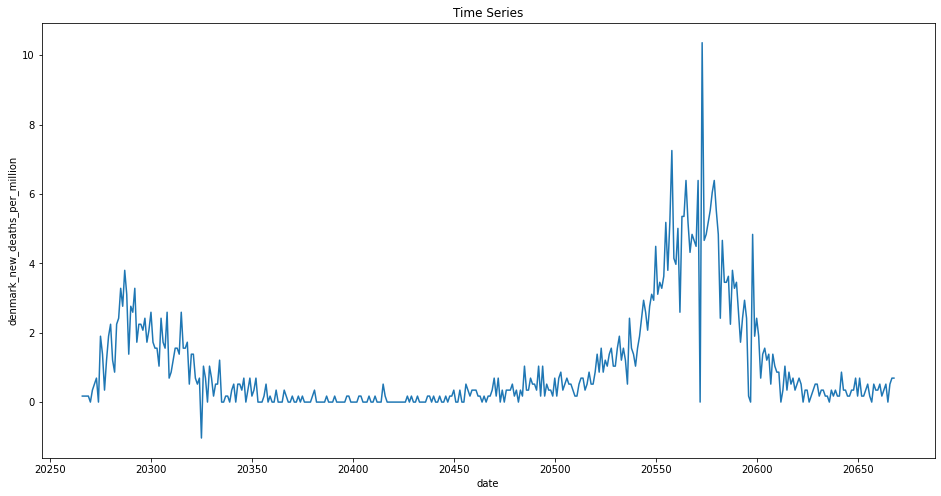

In [240]:
d_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("denmark_new_deaths_per_million")

Compare new cases per million to new deaths per million

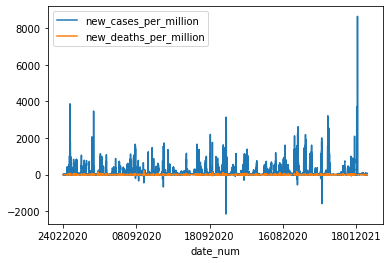

In [241]:
train.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

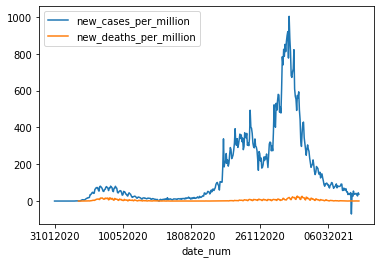

In [242]:
uk_cov19.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

Compare Countries

In [243]:
revised_uk_cov19 = uk_cov19[28:]
revised_uk_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
78252,GBR,Europe,United Kingdom,2020-02-28,56.0,12.0,4.714,NaN,NaN,0.000,0.825,0.177,0.069,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,28022020
78253,GBR,Europe,United Kingdom,2020-02-29,61.0,5.0,5.429,NaN,NaN,0.000,0.899,0.074,0.080,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,29022020
78254,GBR,Europe,United Kingdom,2020-03-01,94.0,33.0,9.429,NaN,NaN,0.000,1.385,0.486,0.139,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,01032020
78255,GBR,Europe,United Kingdom,2020-03-02,134.0,40.0,14.857,NaN,NaN,0.000,1.974,0.589,0.219,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,02032020
78256,GBR,Europe,United Kingdom,2020-03-03,189.0,55.0,22.143,NaN,NaN,0.000,2.784,0.810,0.326,NaN,NaN,0.000,2.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78665,GBR,Europe,United Kingdom,2021-04-16,4398903.0,2807.0,2676.571,127472.0,34.0,26.857,64798.379,41.349,39.427,1877.736,0.501,0.396,0.90,332.0,4.891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42140989.0,32709778.0,9431211.0,635221.0,448491.0,62.08,48.18,13.89,6607.0,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,16042021
78666,GBR,Europe,United Kingdom,2021-04-17,4401176.0,2273.0,2613.714,127508.0,36.0,26.286,64831.861,33.483,38.502,1878.266,0.530,0.387,0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42780069.0,32849223.0,9930846.0,639080.0,456025.0,63.02,48.39,14.63,6718.0,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,17042021
78667,GBR,Europe,United Kingdom,2021-04-18,4403060.0,1884.0,2635.714,127518.0,10.0,26.714,64859.614,27.752,38.826,1878.414,0.147,0.394,0.90,NaN,NaN,NaN,NaN,NaN,NaN,383.0,5

In [244]:
revised_us_cov19 = us_cov19[37:]
revised_us_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
78707,USA,North America,United States,2020-02-28,17.0,0.0,0.143,NaN,NaN,0.000,0.051,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,28022020
78708,USA,North America,United States,2020-02-29,25.0,8.0,1.286,1.0,1.0,0.143,0.076,0.024,0.004,0.003,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,29022020
78709,USA,North America,United States,2020-03-01,32.0,7.0,2.286,1.0,0.0,0.143,0.097,0.021,0.007,0.003,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,372.0,372.0,0.001,0.001,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,01032020
78710,USA,North America,United States,2020-03-02,55.0,23.0,5.571,6.0,5.0,0.857,0.166,0.069,0.017,0.018,0.015,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521.0,893.0,0.003,0.002,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,02032020
78711,USA,North America,United States,2020-03-03,74.0,19.0,8.286,7.0,1.0,1.000,0.224,0.057,0.025,0.021,0.003,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,910.0,1803.0,0.005,0.003,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79120,USA,North America,United States,2021-04-16,31575640.0,79991.0,70096.857,566224.0,861.0,713.143,95393.920,241.663,211.771,1710.633,2.601,2.154,0.98,9474.0,28.622,39079.0,118.062,NaN,NaN,NaN,NaN,810505.0,399565177.0,1207.136,2.449,922106.0,2.786,0.074,13.5,tests performed,202282923.0,127743096.0,80609818.0,3965883.0,3349306.0,60.48,38.20,24.10,10015.0,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,16042021
79121,USA,North America,United States,2021-04-17,31628013.0,52373.0,68073.714,566904.0,680.0,708.714,95552.145,158.225,205.659,1712.687,2.054,2.141,0.98,9472.0,28.616,39090.0,118.096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205871913.0,129494179.0,82471151.0,3588990.0,3200601.0,61.56,38.72,24.66,9570.0,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,N

In [245]:
revised_fr_cov19 = fr_cov19[35:]
revised_fr_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
27137,FRA,Europe,France,2020-02-28,57.0,19.0,6.429,2.0,0.0,0.143,0.836,0.279,0.094,0.029,0.000,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,28022020
27138,FRA,Europe,France,2020-02-29,100.0,43.0,12.571,2.0,0.0,0.143,1.467,0.631,0.184,0.029,0.000,0.002,NaN,9.0,0.132,86.0,1.262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.72,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,29022020
27139,FRA,Europe,France,2020-03-01,130.0,30.0,16.857,2.0,0.0,0.143,1.908,0.440,0.247,0.029,0.000,0.002,2.99,9.0,0.132,116.0,1.702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.72,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,01032020
27140,FRA,Europe,France,2020-03-02,191.0,61.0,25.571,3.0,1.0,0.286,2.803,0.895,0.375,0.044,0.015,0.004,2.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.98,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,02032020
27141,FRA,Europe,France,2020-03-03,212.0,21.0,28.286,4.0,1.0,0.429,3.111,0.308,0.415,0.059,0.015,0.006,2.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.98,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27550,FRA,Europe,France,2021-04-16,5285304.0,36451.0,40712.857,100563.0,331.0,337.286,77556.616,534.882,597.421,1475.663,4.857,4.949,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,419212.0,NaN,NaN,6.152,346621.0,5.086,0.098,10.2,people tested,16731266.0,12315881.0,4415385.0,478706.0,368867.0,24.55,18.07,6.48,5413.0,78.70,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,16042021
27551,FRA,Europe,France,2021-04-17,5321176.0,35872.0,45641.571,100752.0,189.0,362.714,78083.002,526.386,669.745,1478.436,2.773,5.322,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17014525.0,12508863.0,4505662.0,283259.0,367081.0,24.97,18.36,6.61,5387.0,78.70,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,17042021
27552,FRA,Europe,France,2021-04-18,5350521.0,29345.0,32990.857,100892.0,140.0,283.286,78513.611,430.609,484.108,1480.490,2.054,4.157,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [246]:
revised_it_cov19 = it_cov19[28:]
revised_it_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
37223,ITA,Europe,Italy,2020-02-28,888.0,233.0,124.000,21.0,4.0,2.857,14.687,3.854,2.051,0.347,0.066,0.047,3.24,64.0,1.059,409.0,6.765,NaN,NaN,NaN,NaN,3681.0,15695.0,0.260,0.061,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,28022020
37224,ITA,Europe,Italy,2020-02-29,1128.0,240.0,152.286,29.0,8.0,3.857,18.656,3.969,2.519,0.480,0.132,0.064,3.12,105.0,1.737,506.0,8.369,NaN,NaN,NaN,NaN,2966.0,18661.0,0.309,0.049,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,29022020
37225,ITA,Europe,Italy,2020-03-01,1694.0,566.0,219.857,34.0,5.0,4.429,28.018,9.361,3.636,0.562,0.083,0.073,3.05,140.0,2.316,779.0,12.884,NaN,NaN,2277.906,37.675,2466.0,21127.0,0.349,0.041,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,01032020
37226,ITA,Europe,Italy,2020-03-02,2036.0,342.0,258.143,52.0,18.0,6.429,33.674,5.656,4.270,0.860,0.298,0.106,2.86,166.0,2.746,908.0,15.018,NaN,NaN,NaN,NaN,2218.0,23345.0,0.386,0.037,2717.0,0.045,0.095,10.5,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,02032020
37227,ITA,Europe,Italy,2020-03-03,2502.0,466.0,311.429,79.0,27.0,9.857,41.381,7.707,5.151,1.307,0.447,0.163,2.74,229.0,3.788,1263.0,20.889,NaN,NaN,NaN,NaN,2511.0,25856.0,0.428,0.042,2462.0,0.041,0.126,7.9,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37636,ITA,Europe,Italy,2021-04-16,3842079.0,15923.0,15079.000,116366.0,429.0,398.143,63545.532,263.356,249.397,1924.619,7.095,6.585,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327704.0,54532594.0,901.934,5.420,295099.0,4.881,0.051,19.6,tests performed,14707807.0,10360793.0,4347014.0,369678.0,297416.0,24.33,17.14,7.19,4919.0,78.70,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,16042021
37637,ITA,Europe,Italy,2021-04-17,3857443.0,15364.0,14766.571,116676.0,310.0,393.286,63799.642,254.111,244.230,1929.746,5.127,6.505,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331734.0,54864328.0,907.421,5.487,294652.0,4.873,0.050,20.0,tests performed,15055095.0,10627108.0,4427987.0,347288.0,302144.0,24.90,17.58,7.32,4997.0,NaN,60461828.0,205.859,

In [247]:
revised_br_cov19 = br_cov19[2:]
revised_br_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
10627,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,28022020
10628,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,29022020
10629,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,01032020
10630,BRA,South America,Brazil,2020-03-02,2.0,0.0,0.286,NaN,NaN,0.000,0.009,0.000,0.001,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,02032020
10631,BRA,South America,Brazil,2020-03-03,2.0,0.0,0.286,NaN,NaN,0.000,0.009,0.000,0.001,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11040,BRA,South America,Brazil,2021-04-16,13832455.0,85774.0,65611.571,368749.0,3305.0,2861.571,65075.713,403.530,308.674,1734.804,15.549,13.462,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,941458.0,NaN,NaN,NaN,4429.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,16042021
11041,BRA,South America,Brazil,2021-04-17,13900091.0,67636.0,65012.143,371678.0,2929.0,2906.286,65393.911,318.198,305.854,1748.584,13.780,13.673,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,869635.0,NaN,NaN,NaN,4091.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,17042021
11042,BRA,South America,Brazil,2021-04-18,13943071.0,42980.0,65864.000,373335.0,1657.0,2885.429,65596.113,202.202,309.862,1756.380,7.795,13.575,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32947066.0,24350046.0,8597020.0,NaN,886544.0,15.50,11.46,4.04,4171.0,NaN,21255940

In [248]:
revised_sp_cov19 = sp_cov19[27:]
revised_sp_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
70226,ESP,Europe,Spain,2020-02-28,32.0,17.0,4.286,NaN,NaN,0.000,0.684,0.364,0.092,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,28022020
70227,ESP,Europe,Spain,2020-02-29,45.0,13.0,6.143,NaN,NaN,0.000,0.962,0.278,0.131,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,29022020
70228,ESP,Europe,Spain,2020-03-01,84.0,39.0,11.714,NaN,NaN,0.000,1.797,0.834,0.251,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,190.644,4.078,1175.473,25.141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,01032020
70229,ESP,Europe,Spain,2020-03-02,120.0,36.0,16.857,NaN,NaN,0.000,2.567,0.770,0.361,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,02032020
70230,ESP,Europe,Spain,2020-03-03,165.0,45.0,22.714,1.0,1.0,0.143,3.529,0.962,0.486,0.021,0.021,0.003,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70639,ESP,Europe,Spain,2021-04-16,3407283.0,10598.0,8538.714,76981.0,99.0,93.286,72875.603,226.672,182.628,1646.484,2.117,1.995,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12330755.0,9002054.0,3328701.0,445670.0,299847.0,26.37,19.25,7.12,6413.0,67.59,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,16042021
70640,ESP,Europe,Spain,2021-04-17,3407283.0,0.0,8538.714,76981.0,0.0,93.286,72875.603,0.000,182.628,1646.484,0.000,1.995,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,298403.0,NaN,NaN,NaN,6382.0,67.59,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,17042021
70641,ESP,Europe,Spain,2021-04-18,3407283.0,0.0,8538.714,76981.0,0.0,93.286,72875.603,0.000,182.628,1646.484,0.000,1.995,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296959.0,NaN,NaN,NaN,6351.0,67.59,46754783.0,93.105,45.5,19.4

In [249]:
revised_p_cov19 = p_cov19[2:]
revised_p_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
60250,PRT,Europe,Portugal,2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.846,1.554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,15022020
60251,PRT,Europe,Portugal,2020-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.807,1.943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,23022020
60252,PRT,Europe,Portugal,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.721,2.817,NaN,25.0,0.002,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,01032020
60253,PRT,Europe,Portugal,2020-03-02,2.0,2.0,NaN,NaN,NaN,NaN,0.196,0.196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,70.0,0.007,0.004,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,02032020
60254,PRT,Europe,Portugal,2020-03-03,2.0,0.0,NaN,NaN,NaN,NaN,0.196,0.000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,61.0,131.0,0.013,0.006,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60663,PRT,Europe,Portugal,2021-04-16,829911.0,553.0,512.000,16937.0,4.0,4.714,81390.100,54.233,50.212,1661.026,0.392,0.462,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45774.0,9740983.0,955.307,4.489,36304.0,3.560,0.014,70.9,tests performed,2429486.0,1772322.0,657164.0,69644.0,44492.0,23.83,17.38,6.44,4363.0,NaN,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,16042021
60664,PRT,Europe,Portugal,2021-04-17,830560.0,649.0,518.857,16942.0,5.0,4.571,81453.748,63.648,50.885,1661.517,0.490,0.448,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30096.0,9771079.0,958.258,2.952,36061.0,3.537,0.014,69.5,tests performed,2497281.0,1820162.0,677119.0,67795.0,44240.0,24.49,17.85,6.64,4339.0,NaN,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,17042021
60665,PRT,Europe,Portugal,2021-04-18,831001.0,441.0,501.000,16945.0,3.0,4.143,81496.997,43.249,49.134,1661.811,0.294,0.406,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [250]:
revised_c_cov19 = c_cov19[37:]
revised_c_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
15740,CHN,Asia,China,2020-02-28,78928.0,328.0,482.571,2790.0,44.0,78.857,54.837,0.228,0.335,1.938,0.031,0.055,0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,28022020
15741,CHN,Asia,China,2020-02-29,79356.0,428.0,336.429,2837.0,47.0,56.286,55.134,0.297,0.234,1.971,0.033,0.039,0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,29022020
15742,CHN,Asia,China,2020-03-01,79932.0,576.0,415.714,2872.0,35.0,61.000,55.534,0.400,0.289,1.995,0.024,0.042,0.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,01032020
15743,CHN,Asia,China,2020-03-02,80136.0,204.0,413.571,2914.0,42.0,45.571,55.676,0.142,0.287,2.025,0.029,0.032,0.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,02032020
15744,CHN,Asia,China,2020-03-03,80261.0,125.0,358.143,2947.0,33.0,40.286,55.763,0.087,0.249,2.047,0.023,0.028,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16153,CHN,Asia,China,2021-04-16,102167.0,32.0,22.143,4845.0,0.0,0.286,70.983,0.022,0.015,3.366,0.000,0.000,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187360000.0,NaN,NaN,3824000.0,3748429.0,13.02,NaN,NaN,2604.0,78.24,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,16042021
16154,CHN,Asia,China,2021-04-17,102201.0,34.0,24.857,4845.0,0.0,0.286,71.006,0.024,0.017,3.366,0.000,0.000,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189809000.0,NaN,NaN,2449000.0,3619714.0,13.19,NaN,NaN,2515.0,78.24,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,17042021
16155,CHN,Asia,China,2021-04-18,102242.0,41.0,26.571,4845.0,0.0,0.286,71.035,0.028,0.018,3.366,0.000,0.000,1.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192127000.0,NaN,NaN,2318000.0,3540571.0,13.35,NaN

In [251]:
revised_i_cov19 = i_cov19[29:]
revised_i_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
34141,IND,Asia,India,2020-02-28,3.0,0.0,0.000,NaN,NaN,0.000,0.002,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,28022020
34142,IND,Asia,India,2020-02-29,3.0,0.0,0.000,NaN,NaN,0.000,0.002,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,29022020
34143,IND,Asia,India,2020-03-01,3.0,0.0,0.000,NaN,NaN,0.000,0.002,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,01032020
34144,IND,Asia,India,2020-03-02,5.0,2.0,0.286,NaN,NaN,0.000,0.004,0.001,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,02032020
34145,IND,Asia,India,2020-03-03,5.0,0.0,0.286,NaN,NaN,0.000,0.004,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34554,IND,Asia,India,2021-04-16,14526609.0,234692.0,188669.000,175649.0,1341.0,1030.429,10526.495,170.066,136.716,127.281,0.972,0.747,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1473210.0,263476625.0,190.924,1.068,1347863.0,0.977,0.140,7.1,samples tested,119937641.0,104408484.0,15529157.0,2714132.0,3123212.0,8.69,7.57,1.13,2263.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,16042021
34555,IND,Asia,India,2021-04-17,14788003.0,261394.0,204171.143,177150.0,1501.0,1125.000,10715.910,189.415,147.950,128.369,1.088,0.815,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1495397.0,264972022.0,192.008,1.084,1393888.0,1.010,0.146,6.8,samples tested,122622590.0,106431076.0,16191514.0,2684949.0,3003920.0,8.89,7.71,1.17,2177.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,17042021
34556,IND,Asia,India,2021-04-18,15061805.0,273802.0,219155.429,178769.0,1619.0,1227.143,10914.317,198.407,158.808,129.542,1.173,0.889,1.49,NaN,NaN,NaN,Na

In [252]:
revised_t_cov19 = t_cov19[43:]
revised_t_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
73206,TWN,Asia,Taiwan,2020-02-28,34.0,2.0,1.143,1.0,0.0,0.000,1.428,0.084,0.048,0.042,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.0,10318.0,0.433,0.016,499.0,0.021,0.002,436.6,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,28022020
73207,TWN,Asia,Taiwan,2020-02-29,39.0,5.0,1.857,1.0,0.0,0.000,1.638,0.210,0.078,0.042,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,511.0,10829.0,0.455,0.021,508.0,0.021,0.004,273.6,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,29022020
73208,TWN,Asia,Taiwan,2020-03-01,40.0,1.0,1.714,1.0,0.0,0.000,1.679,0.042,0.072,0.042,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,11259.0,0.473,0.018,523.0,0.022,0.003,305.1,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,01032020
73209,TWN,Asia,Taiwan,2020-03-02,41.0,1.0,1.571,1.0,0.0,0.000,1.721,0.042,0.066,0.042,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,11859.0,0.498,0.025,509.0,0.021,0.003,324.0,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,02032020
73210,TWN,Asia,Taiwan,2020-03-03,42.0,1.0,1.571,1.0,0.0,0.000,1.763,0.042,0.066,0.042,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506.0,12365.0,0.519,0.021,494.0,0.021,0.003,314.4,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73619,TWN,Asia,Taiwan,2021-04-16,1070.0,2.0,2.286,11.0,0.0,0.143,44.926,0.084,0.096,0.462,0.0,0.006,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549.0,198710.0,8.343,0.023,480.0,0.020,0.005,210.0,people tested,32389.0,32389.0,NaN,2350.0,1134.0,0.14,0.14,NaN,48.0,25.00,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,16042021
73620,TWN,Asia,Taiwan,2021-04-17,1072.0,2.0,2.286,11.0,0.0,0.143,45.010,0.084,0.096,0.462,0.0,0.006,0.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.0,198850.0,8.349,0.006,467.0,0.020,0.005,204.3,people tested,32450.0,NaN,NaN,61.0,1113.0,0.14,NaN,NaN,47.0,25.00,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,17042021
73621,TWN,Asia,Taiwan,2021-04-18,1073.0,1.0,2.286,11.0,0.0,0.000,45.052,0.042,0.096,0.462,0.0,0.000,0.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.0,198978.0,8.355,0.005,462.0,0.019,0.005,202.1,people tested,NaN,NaN,NaN,NaN,1190.0,NaN,NaN,NaN,50.0,25.00,23816775.0,NaN,42.2,NaN,8.353,NaN,N

In [253]:
revised_j_cov19 = j_cov19[37:]
revised_j_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
38084,JPN,Asia,Japan,2020-02-28,236.0,18.0,17.714,5.0,1.0,0.429,1.866,0.142,0.140,0.040,0.008,0.003,1.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,1382.0,0.011,0.001,105.0,0.001,0.169,5.9,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.26,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,28022020
38085,JPN,Asia,Japan,2020-02-29,245.0,9.0,15.429,6.0,1.0,0.571,1.937,0.071,0.122,0.047,0.008,0.005,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.0,1560.0,0.012,0.001,116.0,0.001,0.133,7.5,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.26,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,29022020
38086,JPN,Asia,Japan,2020-03-01,259.0,14.0,15.714,6.0,0.0,0.571,2.048,0.111,0.124,0.047,0.000,0.005,1.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,1656.0,0.013,0.001,124.0,0.001,0.127,7.9,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.26,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,01032020
38087,JPN,Asia,Japan,2020-03-02,278.0,19.0,16.857,6.0,0.0,0.571,2.198,0.150,0.133,0.047,0.000,0.005,1.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,1727.0,0.014,0.001,120.0,0.001,0.140,7.1,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.52,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,02032020
38088,JPN,Asia,Japan,2020-03-03,298.0,20.0,17.857,6.0,0.0,0.429,2.356,0.158,0.141,0.047,0.000,0.003,1.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.0,1880.0,0.015,0.001,135.0,0.001,0.132,7.6,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.52,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38497,JPN,Asia,Japan,2021-04-16,526307.0,4511.0,3782.286,9552.0,46.0,32.429,4161.304,35.667,29.905,75.524,0.364,0.256,1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77966.0,10215135.0,80.767,0.616,62045.0,0.491,0.061,16.4,people tested,NaN,NaN,NaN,NaN,40953.0,NaN,NaN,NaN,324.0,NaN,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,16042021
38498,JPN,Asia,Japan,2021-04-17,531109.0,4802.0,3938.857,9593.0,41.0,34.429,4199.272,37.968,31.143,75.848,0.324,0.272,1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50503.0,10265638.0,81.166,0.399,63414.0,0.501,0.062,16.1,people tested,NaN,NaN,NaN,NaN,39920.0,NaN,NaN,NaN,316.0,NaN,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,17042021
38499,JPN,Asia,Japan,2021-04-18,535220.0,4111.0,4140.429,9610.0,17.0,34.429,4231.776,32.504,32.737,75.983,0

In [254]:
revised_s_cov19 = s_cov19[27:]
revised_s_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
71929,SWE,Europe,Sweden,2020-02-28,11.0,8.0,1.429,NaN,NaN,0.000,1.089,0.792,0.141,NaN,NaN,0.000,NaN,0.0,0.0,1.0,0.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,28022020
71930,SWE,Europe,Sweden,2020-02-29,14.0,3.0,1.857,NaN,NaN,0.000,1.386,0.297,0.184,NaN,NaN,0.000,NaN,0.0,0.0,1.0,0.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,29022020
71931,SWE,Europe,Sweden,2020-03-01,14.0,0.0,1.857,NaN,NaN,0.000,1.386,0.000,0.184,NaN,NaN,0.000,NaN,0.0,0.0,1.0,0.099,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,01032020
71932,SWE,Europe,Sweden,2020-03-02,19.0,5.0,2.571,NaN,NaN,0.000,1.881,0.495,0.255,NaN,NaN,0.000,NaN,0.0,0.0,3.0,0.297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,02032020
71933,SWE,Europe,Sweden,2020-03-03,32.0,13.0,4.429,NaN,NaN,0.000,3.169,1.287,0.439,NaN,NaN,0.000,NaN,0.0,0.0,3.0,0.297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72342,SWE,Europe,Sweden,2021-04-16,900138.0,7658.0,6105.286,13788.0,27.0,23.857,89129.016,758.273,604.527,1365.247,2.673,2.362,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2316903.0,1667542.0,649361.0,74444.0,45692.0,22.94,16.51,6.43,4524.0,65.74,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,16042021
72343,SWE,Europe,Sweden,2021-04-17,900138.0,0.0,6105.286,13788.0,0.0,23.857,89129.016,0.000,604.527,1365.247,0.000,2.362,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50827.0,NaN,NaN,NaN,5033.0,65.74,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,17042021
72344,SWE,Europe,Sweden,2021-04-18,900138.0,0.0,6105.286,13788.0,0.0,23.857,89129.016,0.000,604.527,1365.247,0.000,2.362,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55963.0,NaN,NaN,NaN,5541.0,65.74,10099270.0,24.718,41.0,19.985,13.433,46949.28

In [255]:
revised_d_cov19 = d_cov19[26:]
revised_d_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
20251,DNK,Europe,Denmark,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.173,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,220.0,0.038,0.011,30.0,0.005,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,28022020
20252,DNK,Europe,Denmark,2020-02-29,3.0,2.0,NaN,NaN,NaN,NaN,0.518,0.345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,294.0,0.051,0.013,41.0,0.007,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,29022020
20253,DNK,Europe,Denmark,2020-03-01,4.0,1.0,NaN,NaN,NaN,NaN,0.691,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995,0.172,49.0,343.0,0.059,0.008,47.0,0.008,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,01032020
20254,DNK,Europe,Denmark,2020-03-02,4.0,0.0,NaN,NaN,NaN,NaN,0.691,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,423.0,0.073,0.014,58.0,0.010,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,02032020
20255,DNK,Europe,Denmark,2020-03-03,6.0,2.0,0.857,NaN,NaN,0.000,1.036,0.345,0.148,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,486.0,0.084,0.011,67.0,0.012,0.013,78.2,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.37,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20664,DNK,Europe,Denmark,2021-04-16,241700.0,677.0,666.000,2453.0,3.0,2.286,41728.510,116.881,114.982,423.500,0.518,0.395,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1536477.0,1039679.0,496798.0,25561.0,34813.0,26.53,17.95,8.58,6010.0,64.81,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,16042021
20665,DNK,Europe,Denmark,2021-04-17,242424.0,724.0,661.571,2453.0,0.0,1.857,41853.505,124.996,114.218,423.500,0.000,0.321,1.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1558011.0,1058474.0,499537.0,21534.0,34717.0,26.90,18.27,8.62,5994.0,64.81,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,17042021
20666,DNK,Europe,Denmark,2021-04-18,243326.0,902.0,691.714,2456.0,3.0,2.000,42009.232,155.727,119.422,424.018,0.518,0.345,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1577664.0,107

In [256]:
revised_sa_cov19 = sa_cov19[21:]
revised_sa_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
68520,ZAF,Africa,South Africa,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,28022020
68521,ZAF,Africa,South Africa,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,29022020
68522,ZAF,Africa,South Africa,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,01032020
68523,ZAF,Africa,South Africa,2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,0.003,NaN,6.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,02032020
68524,ZAF,Africa,South Africa,2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,164.0,0.003,0.000,6.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68933,ZAF,Africa,South Africa,2021-04-16,1564355.0,1424.0,1159.000,53663.0,92.0,62.429,26376.489,24.010,19.542,904.808,1.551,1.053,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31600.0,10291264.0,173.520,0.533,29258.0,0.493,0.040,25.2,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,16042021
68934,ZAF,Africa,South Africa,2021-04-17,1565680.0,1325.0,1164.714,53711.0,48.0,65.000,26398.830,22.341,19.638,905.618,0.809,1.096,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14377.0,10305641.0,173.763,0.242,27103.0,0.457,0.043,23.3,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,17042021
68935,ZAF,Africa,South Africa,2021-04-18,1566769.0,1089.0,1187.286,53736.0,25.0,59.143,26417.191,18.362,20.019,906.039,0.422,0.997,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31425.0,10337066.0,174.293,0.530,28304.0,0.477,

In [257]:
revised_a_cov19 = a_cov19[33:]
revised_a_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
4362,AUS,Oceania,Australia,2020-02-28,15.0,0.0,0.000,NaN,NaN,0.000,0.588,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,28022020
4363,AUS,Oceania,Australia,2020-02-29,25.0,10.0,1.429,NaN,NaN,0.000,0.980,0.392,0.056,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,29022020
4364,AUS,Oceania,Australia,2020-03-01,27.0,2.0,1.714,1.0,1.0,0.143,1.059,0.078,0.067,0.039,0.039,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,01032020
4365,AUS,Oceania,Australia,2020-03-02,30.0,3.0,2.143,1.0,0.0,0.143,1.176,0.118,0.084,0.039,0.000,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,02032020
4366,AUS,Oceania,Australia,2020-03-03,39.0,9.0,3.429,1.0,0.0,0.143,1.529,0.353,0.134,0.039,0.000,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4775,AUS,Oceania,Australia,2021-04-16,29499.0,15.0,14.714,910.0,0.0,0.143,1156.829,0.588,0.577,35.686,0.000,0.006,1.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36988.0,1.451,0.000,2513.8,tests performed,1420577.0,NaN,NaN,60912.0,49009.0,5.57,NaN,NaN,1922.0,44.91,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,16042021
4776,AUS,Oceania,Australia,2021-04-17,29519.0,20.0,16.286,910.0,0.0,0.143,1157.613,0.784,0.639,35.686,0.000,0.006,1.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35914.0,1.408,0.000,2205.2,tests performed,1474558.0,NaN,NaN,53981.0,47956.0,5.78,NaN,NaN,1881.0,44.91,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,17042021
4777,AUS,Oceania,Australia,2021-04-18,29533.0,14.0,16.286,910.0,0.0,0.143,1158.162,0.549,0.639,35.686,0.000,0.006,1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16357455.0,641.472,NaN,34841.0,1.366,0.000,2139.3,tests performed,1496912.0,NaN,NaN,22354.0,4719

In [258]:
revised_uk_cov19.new_cases_per_million.shape, revised_us_cov19.new_cases_per_million.shape, revised_uk_cov19.new_deaths_per_million.shape, revised_us_cov19.new_deaths_per_million.shape

((418,), (418,), (418,), (418,))

In [259]:
date = revised_uk_cov19.date.values
uk_new_case_per_million = revised_uk_cov19.new_cases_per_million
uk_new_death_per_million = revised_uk_cov19.new_deaths_per_million

In [260]:
us_new_case_per_million = revised_us_cov19.new_cases_per_million
us_new_death_per_million = revised_us_cov19.new_deaths_per_million

In [261]:
date = revised_fr_cov19.date.values
fr_new_case_per_million = revised_fr_cov19.new_cases_per_million
fr_new_death_per_million = revised_fr_cov19.new_deaths_per_million

In [262]:
date = revised_it_cov19.date.values
it_new_case_per_million = revised_it_cov19.new_cases_per_million
it_new_death_per_million = revised_it_cov19.new_deaths_per_million

In [263]:
br_new_case_per_million = revised_br_cov19.new_cases_per_million
br_new_death_per_million = revised_br_cov19.new_deaths_per_million

In [264]:
p_new_case_per_million = revised_p_cov19.new_cases_per_million
p_new_death_per_million = revised_p_cov19.new_deaths_per_million

In [265]:
sp_new_case_per_million = revised_sp_cov19.new_cases_per_million
sp_new_death_per_million = revised_sp_cov19.new_deaths_per_million

In [266]:
c_new_case_per_million = revised_c_cov19.new_cases_per_million
c_new_death_per_million = revised_c_cov19.new_deaths_per_million

In [267]:
i_new_case_per_million = revised_i_cov19.new_cases_per_million
i_new_death_per_million = revised_i_cov19.new_deaths_per_million

In [268]:
t_new_case_per_million = revised_t_cov19.new_cases_per_million
t_new_death_per_million = revised_t_cov19.new_deaths_per_million

In [269]:
j_new_case_per_million = revised_j_cov19.new_cases_per_million
j_new_death_per_million = revised_j_cov19.new_deaths_per_million

In [270]:
sa_new_case_per_million = revised_sa_cov19.new_cases_per_million
sa_new_death_per_million = revised_sa_cov19.new_deaths_per_million

In [271]:
n_new_case_per_million = n_cov19.new_cases_per_million
n_new_death_per_million = n_cov19.new_deaths_per_million

In [272]:
nz_new_case_per_million = nz_cov19.new_cases_per_million
nz_new_death_per_million = nz_cov19.new_deaths_per_million

In [273]:
a_new_case_per_million = revised_a_cov19.new_cases_per_million
a_new_death_per_million = revised_a_cov19.new_deaths_per_million

In [274]:
s_new_case_per_million = revised_s_cov19.new_cases_per_million
s_new_death_per_million = revised_s_cov19.new_deaths_per_million

In [275]:
d_new_case_per_million = revised_d_cov19.new_cases_per_million
d_new_death_per_million = revised_d_cov19.new_deaths_per_million

In [276]:
uk_compare = pd.DataFrame({'date': date,'uk_new_cse_pr_million': uk_new_case_per_million, 'uk_new_dth_pr_million': uk_new_death_per_million})
uk_compare

,date,uk_new_cse_pr_million,uk_new_dth_pr_million
78252,2020-02-28,0.177,NaN
78253,2020-02-29,0.074,NaN
78254,2020-03-01,0.486,NaN
78255,2020-03-02,0.589,NaN
78256,2020-03-03,0.810,NaN
...,...,...,...
78665,2021-04-16,41.349,0.501
78666,2021-04-17,33.483,0.530
78667,2021-04-18,27.752,0.147
78668,2021-04-19,44.987,0.088


In [277]:
us_compare = pd.DataFrame({'date': date,'us_new_cse_pr_million': us_new_case_per_million, 'us_new_dth_pr_million': us_new_death_per_million})
us_compare

,date,us_new_cse_pr_million,us_new_dth_pr_million
78707,2020-02-28,0.000,NaN
78708,2020-02-29,0.024,0.003
78709,2020-03-01,0.021,0.000
78710,2020-03-02,0.069,0.015
78711,2020-03-03,0.057,0.003
...,...,...,...
79120,2021-04-16,241.663,2.601
79121,2021-04-17,158.225,2.054
79122,2021-04-18,126.942,0.946
79123,2021-04-19,205.234,1.441


In [278]:
fr_compare = pd.DataFrame({'date': date,'fr_new_cse_pr_million': fr_new_case_per_million, 'fr_new_dth_pr_million': fr_new_death_per_million})
fr_compare

,date,fr_new_cse_pr_million,fr_new_dth_pr_million
27137,2020-02-28,0.279,0.000
27138,2020-02-29,0.631,0.000
27139,2020-03-01,0.440,0.000
27140,2020-03-02,0.895,0.015
27141,2020-03-03,0.308,0.015
...,...,...,...
27550,2021-04-16,534.882,4.857
27551,2021-04-17,526.386,2.773
27552,2021-04-18,430.609,2.054
27553,2021-04-19,98.433,6.559


In [279]:
it_compare = pd.DataFrame({'date': date,'it_new_cse_pr_million': it_new_case_per_million, 'it_new_dth_pr_million': it_new_death_per_million})
it_compare

,date,it_new_cse_pr_million,it_new_dth_pr_million
37223,2020-02-28,3.854,0.066
37224,2020-02-29,3.969,0.132
37225,2020-03-01,9.361,0.083
37226,2020-03-02,5.656,0.298
37227,2020-03-03,7.707,0.447
...,...,...,...
37636,2021-04-16,263.356,7.095
37637,2021-04-17,254.111,5.127
37638,2021-04-18,209.851,4.151
37639,2021-04-19,146.588,5.226


In [280]:
br_compare = pd.DataFrame({'date': date,'br_new_cse_pr_million': br_new_case_per_million, 'br_new_dth_pr_million': br_new_death_per_million})
br_compare

,date,br_new_cse_pr_million,br_new_dth_pr_million
10627,2020-02-28,0.000,NaN
10628,2020-02-29,0.005,NaN
10629,2020-03-01,0.000,NaN
10630,2020-03-02,0.000,NaN
10631,2020-03-03,0.000,NaN
...,...,...,...
11040,2021-04-16,403.530,15.549
11041,2021-04-17,318.198,13.780
11042,2021-04-18,202.202,7.795
11043,2021-04-19,144.073,6.337


In [281]:
p_compare = pd.DataFrame({'date': date,'p_new_cse_pr_million': p_new_case_per_million, 'p_new_dth_pr_million': p_new_death_per_million})
p_compare

,date,p_new_cse_pr_million,p_new_dth_pr_million
60250,2020-02-28,NaN,NaN
60251,2020-02-29,NaN,NaN
60252,2020-03-01,NaN,NaN
60253,2020-03-02,0.196,NaN
60254,2020-03-03,0.000,NaN
...,...,...,...
60663,2021-04-16,54.233,0.392
60664,2021-04-17,63.648,0.490
60665,2021-04-18,43.249,0.294
60666,2021-04-19,21.576,0.098


In [282]:
sp_compare = pd.DataFrame({'date': date,'sp_new_cse_pr_million': sp_new_case_per_million, 'sp_new_dth_pr_million': sp_new_death_per_million})
sp_compare

,date,sp_new_cse_pr_million,sp_new_dth_pr_million
70226,2020-02-28,0.364,NaN
70227,2020-02-29,0.278,NaN
70228,2020-03-01,0.834,NaN
70229,2020-03-02,0.770,NaN
70230,2020-03-03,0.962,0.021
...,...,...,...
70639,2021-04-16,226.672,2.117
70640,2021-04-17,0.000,0.000
70641,2021-04-18,0.000,0.000
70642,2021-04-19,450.670,2.588


In [283]:
i_compare = pd.DataFrame({'date': date,'i_new_cse_pr_million': i_new_case_per_million, 'i_new_dth_pr_million': i_new_death_per_million})
i_compare

,date,i_new_cse_pr_million,i_new_dth_pr_million
34141,2020-02-28,0.000,NaN
34142,2020-02-29,0.000,NaN
34143,2020-03-01,0.000,NaN
34144,2020-03-02,0.001,NaN
34145,2020-03-03,0.000,NaN
...,...,...,...
34554,2021-04-16,170.066,0.972
34555,2021-04-17,189.415,1.088
34556,2021-04-18,198.407,1.173
34557,2021-04-19,187.802,1.276


In [284]:
c_compare = pd.DataFrame({'date': date,'c_new_cse_pr_million': c_new_case_per_million, 'c_new_dth_pr_million': c_new_death_per_million})
c_compare

,date,c_new_cse_pr_million,c_new_dth_pr_million
15740,2020-02-28,0.228,0.031
15741,2020-02-29,0.297,0.033
15742,2020-03-01,0.400,0.024
15743,2020-03-02,0.142,0.029
15744,2020-03-03,0.087,0.023
...,...,...,...
16153,2021-04-16,0.022,0.000
16154,2021-04-17,0.024,0.000
16155,2021-04-18,0.028,0.000
16156,2021-04-19,0.015,0.000


In [285]:
t_compare = pd.DataFrame({'date': date,'t_new_cse_pr_million': t_new_case_per_million, 't_new_dth_pr_million': t_new_death_per_million})
t_compare

,date,t_new_cse_pr_million,t_new_dth_pr_million
73206,2020-02-28,0.084,0.0
73207,2020-02-29,0.210,0.0
73208,2020-03-01,0.042,0.0
73209,2020-03-02,0.042,0.0
73210,2020-03-03,0.042,0.0
...,...,...,...
73619,2021-04-16,0.084,0.0
73620,2021-04-17,0.084,0.0
73621,2021-04-18,0.042,0.0
73622,2021-04-19,0.126,0.0


In [286]:
j_compare = pd.DataFrame({'date': date,'j_new_cse_pr_million': j_new_case_per_million, 'j_new_dth_pr_million': j_new_death_per_million})
j_compare

,date,j_new_cse_pr_million,j_new_dth_pr_million
38084,2020-02-28,0.142,0.008
38085,2020-02-29,0.071,0.008
38086,2020-03-01,0.111,0.000
38087,2020-03-02,0.150,0.000
38088,2020-03-03,0.158,0.000
...,...,...,...
38497,2021-04-16,35.667,0.364
38498,2021-04-17,37.968,0.324
38499,2021-04-18,32.504,0.134
38500,2021-04-19,17.980,0.150


In [287]:
sa_compare = pd.DataFrame({'date': date,'sa_new_cse_pr_million': sa_new_case_per_million, 'sa_new_dth_pr_million': sa_new_death_per_million})
sa_compare

,date,sa_new_cse_pr_million,sa_new_dth_pr_million
68520,2020-02-28,NaN,NaN
68521,2020-02-29,NaN,NaN
68522,2020-03-01,NaN,NaN
68523,2020-03-02,NaN,NaN
68524,2020-03-03,NaN,NaN
...,...,...,...
68933,2021-04-16,24.010,1.551
68934,2021-04-17,22.341,0.809
68935,2021-04-18,18.362,0.422
68936,2021-04-19,12.545,0.354


In [288]:
n_compare = pd.DataFrame({'date': date,'n_new_cse_pr_million': n_new_case_per_million, 'n_new_dth_pr_million': n_new_death_per_million})
n_compare

,date,n_new_cse_pr_million,n_new_dth_pr_million
54185,2020-02-28,0.005,NaN
54186,2020-02-29,0.000,NaN
54187,2020-03-01,0.000,NaN
54188,2020-03-02,0.000,NaN
54189,2020-03-03,0.000,NaN
...,...,...,...
54598,2021-04-16,0.325,0.0
54599,2021-04-17,0.291,0.0
54600,2021-04-18,0.126,0.0
54601,2021-04-19,0.340,0.0


In [289]:
nz_compare = pd.DataFrame({'date': date,'nz_new_cse_pr_million': nz_new_case_per_million, 'nz_new_dth_pr_million': nz_new_death_per_million})
nz_compare

,date,nz_new_cse_pr_million,nz_new_dth_pr_million
52972,2020-02-28,0.207,NaN
52973,2020-02-29,0.000,NaN
52974,2020-03-01,0.000,NaN
52975,2020-03-02,0.000,NaN
52976,2020-03-03,0.000,NaN
...,...,...,...
53385,2021-04-16,0.000,0.0
53386,2021-04-17,0.829,0.0
53387,2021-04-18,0.207,0.0
53388,2021-04-19,0.207,0.0


In [290]:
a_compare = pd.DataFrame({'date': date,'a_new_cse_pr_million': a_new_case_per_million, 'a_new_dth_pr_million': a_new_death_per_million})
a_compare

,date,a_new_cse_pr_million,a_new_dth_pr_million
4362,2020-02-28,0.000,NaN
4363,2020-02-29,0.392,NaN
4364,2020-03-01,0.078,0.039
4365,2020-03-02,0.118,0.000
4366,2020-03-03,0.353,0.000
...,...,...,...
4775,2021-04-16,0.588,0.000
4776,2021-04-17,0.784,0.000
4777,2021-04-18,0.549,0.000
4778,2021-04-19,0.902,0.000


In [291]:
s_compare = pd.DataFrame({'date': date,'s_new_cse_pr_million': s_new_case_per_million, 's_new_dth_pr_million': s_new_death_per_million})
s_compare

,date,s_new_cse_pr_million,s_new_dth_pr_million
71929,2020-02-28,0.792,NaN
71930,2020-02-29,0.297,NaN
71931,2020-03-01,0.000,NaN
71932,2020-03-02,0.495,NaN
71933,2020-03-03,1.287,NaN
...,...,...,...
72342,2021-04-16,758.273,2.673
72343,2021-04-17,0.000,0.000
72344,2021-04-18,0.000,0.000
72345,2021-04-19,0.000,0.000


In [292]:
d_compare = pd.DataFrame({'date': date,'d_new_cse_pr_million': d_new_case_per_million, 'd_new_dth_pr_million': d_new_death_per_million})
d_compare

,date,d_new_cse_pr_million,d_new_dth_pr_million
20251,2020-02-28,0.000,NaN
20252,2020-02-29,0.345,NaN
20253,2020-03-01,0.173,NaN
20254,2020-03-02,0.000,NaN
20255,2020-03-03,0.345,NaN
...,...,...,...
20664,2021-04-16,116.881,0.518
20665,2021-04-17,124.996,0.000
20666,2021-04-18,155.727,0.518
20667,2021-04-19,127.931,0.691


In [293]:
compare = pd.merge(uk_compare, us_compare, on="date").merge(c_compare, on="date").merge(sa_compare, on="date") \
.merge(s_compare, on="date").merge(t_compare, on='date').merge(d_compare, on='date').merge(n_compare, on="date") \
.merge(j_compare, on='date').merge(i_compare, on='date').merge(nz_compare, on='date').merge(a_compare, on="date") \
.merge(sp_compare, on='date').merge(br_compare,on='date').merge(p_compare, on='date').merge(it_compare, on="date") \
.merge(fr_compare, on='date')
compare

,date,uk_new_cse_pr_million,uk_new_dth_pr_million,us_new_cse_pr_million,us_new_dth_pr_million,c_new_cse_pr_million,c_new_dth_pr_million,sa_new_cse_pr_million,sa_new_dth_pr_million,s_new_cse_pr_million,s_new_dth_pr_million,t_new_cse_pr_million,t_new_dth_pr_million,d_new_cse_pr_million,d_new_dth_pr_million,n_new_cse_pr_million,n_new_dth_pr_million,j_new_cse_pr_million,j_new_dth_pr_million,i_new_cse_pr_million,i_new_dth_pr_million,nz_new_cse_pr_million,nz_new_dth_pr_million,a_new_cse_pr_million,a_new_dth_pr_million,sp_new_cse_pr_million,sp_new_dth_pr_million,br_new_cse_pr_million,br_new_dth_pr_million,p_new_cse_pr_million,p_new_dth_pr_million,it_new_cse_pr_million,it_new_dth_pr_million,fr_new_cse_pr_million,fr_new_dth_pr_million
0,2020-02-28,0.177,NaN,0.000,NaN,0.228,0.031,NaN,NaN,0.792,NaN,0.084,0.0,0.000,NaN,0.005,NaN,0.142,0.008,0.000,NaN,0.207,NaN,0.000,NaN,0.364,NaN,0.000,NaN,NaN,NaN,3.854,0.066,0.279,0.000
1,2020-02-29,0.074,NaN,0.024,0.003,0.297,0.033,NaN,NaN,0.297,NaN,0.210,0.0,0.345,NaN,0.000,NaN,0.071,0.008,0.000,NaN,0.000,NaN,0.392,NaN,0.278,NaN,0.005,NaN,NaN,NaN,3.969,0.132,0.631,0.000
2,2020-03-01,0.486,NaN,0.021,0.000,0.400,0.024,NaN,NaN,0.000,NaN,0.042,0.0,0.173,NaN,0.000,NaN,0.111,0.000,0.000,NaN,0.000,NaN,0.078,0.039,0.834,NaN,0.000,NaN,NaN,NaN,9.361,0.083,0.440,0.000
3,2020-03-02,0.589,NaN,0.069,0.015,0.142,0.029,NaN,NaN,0.495,NaN,0.042,0.0,0.000,NaN,0.000,NaN,0.150,0.000,0.001,NaN,0.000,NaN,0.118,0.000,0.770,NaN,0.000,NaN,0.196,NaN,5.656,0.298,0.895,0.015
4,2020-03-03,0.810,NaN,0.057,0.003,0.087,0.023,NaN,NaN,1.287,NaN,0.042,0.0,0.345,NaN,0.000,NaN,0.158,0.000,0.000,NaN,0.000,NaN,0.353,0.000,0.962,0.021,0.000,NaN,0.000,NaN,7.707,0.447,0.308,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2021-04-16,41.349,0.501,241.663,2.601,0.022,0.000,24.010,1.551,758.273,2.673,0.084,0.0,116.881,0.518,0.325,0.0,35.667,0.364,170.066,0.972,0.000,0.0,0.588,0.000,226.672,2.117,403.530,15.549,54.233,0.392,263.356,7.095,534.882,4.857
414,2021-04-17,33.483,0.530,158.225,2.054,0.024,0.000,22.341,0.809,0.000,0.000,0.084,0.0,124.996,0.000,0.291,0.0,37.968,0.324,189.415,1.088,0.829,0.0,0.784,0.000,0.000,0.000,318.198,13.780,63.648,0.490,254.111,5.127,526.386,2.773
415,2021-04-18,27.752,0.147,126.942,0.946,0.028,0.000,18.362,0.422,0.000,0.000,0.042,0.0,155.727,0.518,0.126,0.0,32.504,0.134,198.407,1.173,0.207,0.0,0.549,0.000,0.000,0.000,202.202,7.795,43.249,0.294,209.851,4.151,430.609,2.054
416,2021-04-19,44.987,0.088,205.234,1.441,0.015,0.000,12.545,0.354,0.000,0.000,0.126,0.0,127.931,0.691,0.340,0.0,17.980,0.150,187.802,1.276,0.207,0.0,0.902,0.000,450.670,2.588,144.073,6.337,21.576,0.098,146.588,5.226,98.433,6.559


In [294]:
compare.isnull().sum()

date                      0
uk_new_cse_pr_million     0
uk_new_dth_pr_million     7
us_new_cse_pr_million     0
us_new_dth_pr_million     1
c_new_cse_pr_million      0
c_new_dth_pr_million      0
sa_new_cse_pr_million     6
sa_new_dth_pr_million    28
s_new_cse_pr_million      0
s_new_dth_pr_million     11
t_new_cse_pr_million      0
t_new_dth_pr_million      0
d_new_cse_pr_million      0
d_new_dth_pr_million     15
n_new_cse_pr_million      0
n_new_dth_pr_million     24
j_new_cse_pr_million      0
j_new_dth_pr_million      0
i_new_cse_pr_million      0
i_new_dth_pr_million     12
nz_new_cse_pr_million     0
nz_new_dth_pr_million    30
a_new_cse_pr_million      0
a_new_dth_pr_million      2
sp_new_cse_pr_million     0
sp_new_dth_pr_million     4
br_new_cse_pr_million     0
br_new_dth_pr_million    18
p_new_cse_pr_million      3
p_new_dth_pr_million     18
it_new_cse_pr_million     0
it_new_dth_pr_million     0
fr_new_cse_pr_million     0
fr_new_dth_pr_million     0
dtype: int64

In [295]:
compare.fillna(0,inplace=True)

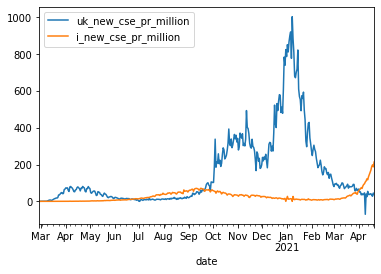

In [296]:
compare.plot(x="date", y=["uk_new_cse_pr_million", "i_new_cse_pr_million" ])

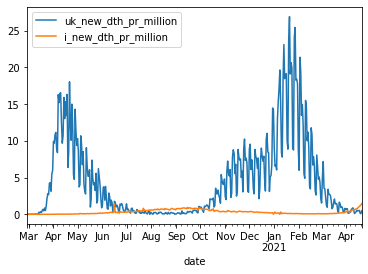

In [297]:
compare.plot(x="date", y=["uk_new_dth_pr_million", "i_new_dth_pr_million" ])

Check for null values

In [298]:
train.isnull().sum()

iso_code                                     0
continent                                 4021
location                                     0
date                                         0
total_cases                               1906
new_cases                                 1908
new_cases_smoothed                        2909
total_deaths                             11490
new_deaths                               11332
new_deaths_smoothed                       2909
total_cases_per_million                   2345
new_cases_per_million                     2347
new_cases_smoothed_per_million            3343
total_deaths_per_million                 11916
new_deaths_per_million                   11758
new_deaths_smoothed_per_million           3343
reproduction_rate                        16048
icu_patients                             74365
icu_patients_per_million                 74365
hosp_patients                            72591
hosp_patients_per_million                72591
weekly_icu_ad

Impute missing values

In [299]:
train = train.drop(['date'], axis=1)

In [300]:
train.dtypes[train.dtypes != 'int64'][train.dtypes != 'float64']

iso_code       object
continent      object
location       object
tests_units    object
date_num       object
dtype: object

Impute null values in categorical columns

In [301]:
train['iso_code'] = train['iso_code'].fillna('Not Listed')
train['continent'] = train['continent'].fillna('Not Listed')
train['location'] = train['location'].fillna('Not Listed')
train['tests_units'] = train['tests_units'].fillna('Not Listed')

Impute numeric columns with 0

In [302]:
train.fillna(0,inplace=True)

Ordinal encoder

In [303]:
#ordinal encoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

train.iso_code = enc.fit_transform(train.iso_code.values.reshape(-1,1))
train.continent = enc.fit_transform(train.continent.values.reshape(-1,1))
train.location = enc.fit_transform(train.location.values.reshape(-1,1))
train.tests_units = enc.fit_transform(train.tests_units.values.reshape(-1,1))

Define X and y

In [304]:
iso_code = train.iso_code

y = train[['new_deaths']]
X = train.drop(['iso_code', 'new_deaths', 'total_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 
                 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 
                 'new_deaths_smoothed_per_million'], axis=1)

Standard Scaler

In [305]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [306]:
y

,new_deaths
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
82983,1.0
82984,1.0
82985,1.0
82986,0.0


In [307]:
X

array([[-0.47282845, -1.71789122, -0.15977112, ..., -0.25992785,
        -0.60433115,  0.94954069],
       [-0.47282845, -1.71789122, -0.15980021, ..., -0.25992785,
        -0.60433115,  1.06374771],
       [-0.47282845, -1.71789122, -0.15980021, ..., -0.25992785,
        -0.60433115,  1.17795473],
       ...,
       [-1.06923967,  1.70622249, -0.15828778, ..., -0.4486572 ,
        -0.36561832,  0.26658281],
       [-1.06923967,  1.70622249, -0.15665901, ..., -0.4486572 ,
        -0.36561832,  0.38078984],
       [-1.06923967,  1.70622249, -0.15933484, ..., -0.4486572 ,
        -0.36561832,  0.49499686]])

Split training file up for training and validation

In [308]:
#split train set for testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((74689, 47), (8299, 47), (74689, 1), (8299, 1))

Select model

In [309]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(max_iter=2000, random_state=1).fit(X_train, y_train)
print(model.score(X_train, y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9904273558692297


Predict on validation set

In [310]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
y_pred[y_pred < 0] = 0
print(model.score(X_val, y_val)), print(r2_score(y_pred, model.predict(X_val)))

0.9319282086796575
0.9997699749895257


(None, None)

In [311]:
y_val

,new_deaths
76583,23.0
35960,84.0
25930,2127.0
70215,0.0
67204,0.0
...,...
60088,275.0
44158,43.0
80617,3.0
68800,160.0


In [312]:
y_train.values

array([[168.],
       [ 44.],
       [ 17.],
       ...,
       [  0.],
       [ 19.],
       [127.]])

In [313]:
y_pred

array([  25,   86, 1825, ...,    1,  187,  250])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


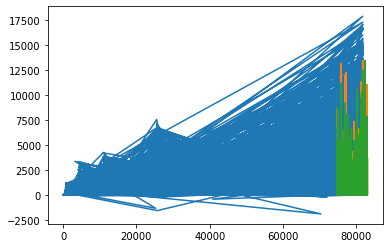

In [314]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train.values] + [x for x in y_val.values])
pyplot.plot([None for i in y_train.values] + [x for x in y_pred.astype(int)])
pyplot.show()

Put predictions in dataframe

In [315]:
df_val=pd.DataFrame({'actual_deaths': y_val.values.ravel(), 'predicted_deaths':y_pred.astype(int)})
df_val.reset_index(drop=True, inplace=True)
df_val

,actual_deaths,predicted_deaths
0,23.0,25
1,84.0,86
2,2127.0,1825
3,0.0,2
4,0.0,0
...,...,...
8294,275.0,316
8295,43.0,27
8296,3.0,1
8297,160.0,187


Create test dataset

In [316]:
test = last_date.copy()
test.date = today
test

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
421,AFG,Asia,Afghanistan,2021-04-21,58037.0,139.0,96.143,2549.0,3.0,2.857,1490.868,3.571,2.470,65.479,0.077,0.073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,20042021
854,OWID_AFR,NaN,Africa,2021-04-21,4450504.0,10111.0,11458.143,118608.0,411.0,318.571,3319.790,7.542,8.547,88.474,0.307,0.238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15475477.0,10591039.0,4656514.0,63625.0,157090.0,1.15,0.79,0.35,117.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20042021
1275,ALB,Europe,Albania,2021-04-21,129842.0,148.0,155.714,2353.0,6.0,3.857,45118.493,51.428,54.109,817.638,2.085,1.340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350000.0,NaN,NaN,4066.0,9826.0,12.16,NaN,NaN,3414.0,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,20042021
1696,DZA,Africa,Algeria,2021-04-21,119992.0,187.0,170.429,3165.0,5.0,4.000,2736.355,4.264,3.887,72.176,0.114,0.091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,20042021
2111,AND,Europe,Andorra,2021-04-21,12874.0,69.0,37.143,123.0,0.0,0.286,166621.368,893.030,480.720,1591.924,0.000,3.698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,20042021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81360,VNM,Asia,Vietnam,2021-04-21,2800.0,9.0,12.286,35.0,0.0,0.000,28.766,0.092,0.126,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106929.0,106929.0,NaN,26072.0,6684.0,0.11,0.11,NaN,69.0,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704,20042021
81815,OWID_WRL,NaN,World,2021-04-21,142946244.0,847824.0,786203.429,3043955.0,14140.0,12113.857,18338.670,108.768,100.863,390.511,1.814,1.554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,928675144.0,515309899.0,212517441.0,6237954.0,14391217.0,11.91,6.61,2.73,1846.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,20042021
82191,YEM,Asia,Yemen,2021-04-21,5918.0,60.0,58.714,1138.0,6.0,9.286,198.418,2.012,1.969,38.155,0.201,0.311,NaN,NaN,NaN,Na

Convert date to number

In [317]:
import datetime 

test['date'] = pd.to_datetime(test['date'], errors='coerce')

test['date_num'] = test['date'].dt.strftime('%d%m%Y')
test

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
421,AFG,Asia,Afghanistan,2021-04-21,58037.0,139.0,96.143,2549.0,3.0,2.857,1490.868,3.571,2.470,65.479,0.077,0.073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,21042021
854,OWID_AFR,NaN,Africa,2021-04-21,4450504.0,10111.0,11458.143,118608.0,411.0,318.571,3319.790,7.542,8.547,88.474,0.307,0.238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15475477.0,10591039.0,4656514.0,63625.0,157090.0,1.15,0.79,0.35,117.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21042021
1275,ALB,Europe,Albania,2021-04-21,129842.0,148.0,155.714,2353.0,6.0,3.857,45118.493,51.428,54.109,817.638,2.085,1.340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350000.0,NaN,NaN,4066.0,9826.0,12.16,NaN,NaN,3414.0,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,21042021
1696,DZA,Africa,Algeria,2021-04-21,119992.0,187.0,170.429,3165.0,5.0,4.000,2736.355,4.264,3.887,72.176,0.114,0.091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,21042021
2111,AND,Europe,Andorra,2021-04-21,12874.0,69.0,37.143,123.0,0.0,0.286,166621.368,893.030,480.720,1591.924,0.000,3.698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,21042021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81360,VNM,Asia,Vietnam,2021-04-21,2800.0,9.0,12.286,35.0,0.0,0.000,28.766,0.092,0.126,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106929.0,106929.0,NaN,26072.0,6684.0,0.11,0.11,NaN,69.0,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704,21042021
81815,OWID_WRL,NaN,World,2021-04-21,142946244.0,847824.0,786203.429,3043955.0,14140.0,12113.857,18338.670,108.768,100.863,390.511,1.814,1.554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,928675144.0,515309899.0,212517441.0,6237954.0,14391217.0,11.91,6.61,2.73,1846.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,21042021
82191,YEM,Asia,Yemen,2021-04-21,5918.0,60.0,58.714,1138.0,6.0,9.286,198.418,2.012,1.969,38.155,0.201,0.311,NaN,NaN,NaN,Na

Check for null values

In [318]:
test.isnull().sum()

iso_code                                   0
continent                                  9
location                                   0
date                                       0
total_cases                                8
new_cases                                  8
new_cases_smoothed                         8
total_deaths                              17
new_deaths                                17
new_deaths_smoothed                        8
total_cases_per_million                    9
new_cases_per_million                      9
new_cases_smoothed_per_million             9
total_deaths_per_million                  18
new_deaths_per_million                    18
new_deaths_smoothed_per_million            9
reproduction_rate                        207
icu_patients                             206
icu_patients_per_million                 206
hosp_patients                            206
hosp_patients_per_million                206
weekly_icu_admissions                    207
weekly_icu

Impute missing values

In [319]:
predict_date = test.date

test = test.drop(['date'], axis=1)

In [320]:
test.dtypes[test.dtypes != 'int64'][test.dtypes != 'float64']

iso_code       object
continent      object
location       object
tests_units    object
date_num       object
dtype: object

Impute categorical values

In [321]:
test['iso_code'] = test['iso_code'].fillna('Not Listed')
test['continent'] = test['continent'].fillna('Not Listed')
test['location'] = test['location'].fillna('Not Listed')
test['tests_units'] = test['tests_units'].fillna('Not Listed')

Impute numeric values with zero

In [322]:
test.fillna(0,inplace=True)

In [323]:
test

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
421,AFG,Asia,Afghanistan,58037.0,139.0,96.143,2549.0,3.0,2.857,1490.868,3.571,2.470,65.479,0.077,0.073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,Not Listed,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.000,0.000,37.746,0.500,64.83,0.511,21042021
854,OWID_AFR,Not Listed,Africa,4450504.0,10111.0,11458.143,118608.0,411.0,318.571,3319.790,7.542,8.547,88.474,0.307,0.238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,Not Listed,15475477.0,10591039.0,4656514.0,63625.0,157090.0,1.15,0.79,0.35,117.0,0.0,1.340598e+09,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,21042021
1275,ALB,Europe,Albania,129842.0,148.0,155.714,2353.0,6.0,3.857,45118.493,51.428,54.109,817.638,2.085,1.340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,Not Listed,350000.0,0.0,0.0,4066.0,9826.0,12.16,0.00,0.00,3414.0,0.0,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,0.000,2.890,78.57,0.795,21042021
1696,DZA,Africa,Algeria,119992.0,187.0,170.429,3165.0,5.0,4.000,2736.355,4.264,3.887,72.176,0.114,0.091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,Not Listed,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,21042021
2111,AND,Europe,Andorra,12874.0,69.0,37.143,123.0,0.0,0.286,166621.368,893.030,480.720,1591.924,0.000,3.698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,Not Listed,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,7.726500e+04,163.755,0.0,0.000,0.000,0.000,0.0,109.135,7.97,29.000,37.800,0.000,0.000,83.73,0.868,21042021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81360,VNM,Asia,Vietnam,2800.0,9.0,12.286,35.0,0.0,0.000,28.766,0.092,0.126,0.360,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,Not Listed,106929.0,106929.0,0.0,26072.0,6684.0,0.11,0.11,0.00,69.0,0.0,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704,21042021
81815,OWID_WRL,Not Listed,World,142946244.0,847824.0,786203.429,3043955.0,14140.0,12113.857,18338.670,108.768,100.863,390.511,1.814,1.554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,Not Listed,928675144.0,515309899.0,212517441.0,6237954.0,14391217.0,11.91,6.61,2.73,1846.0,0.0,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,21042021
82191,YEM,Asia,Yemen,5918.0,60.0,58.714,1138.0,6.0,9

Ordinal encoder

In [324]:
test_country = test.location
test_country

421      Afghanistan
854           Africa
1275         Albania
1696         Algeria
2111         Andorra
            ...     
81360        Vietnam
81815          World
82191          Yemen
82590         Zambia
82987       Zimbabwe
Name: location, Length: 207, dtype: object

In [325]:
test.iso_code = enc.fit_transform(test.iso_code.values.reshape(-1,1))
test.continent = enc.fit_transform(test.continent.values.reshape(-1,1))
test.location = enc.fit_transform(test.location.values.reshape(-1,1))
test.tests_units = enc.fit_transform(test.tests_units.values.reshape(-1,1))

Define X_test

In [326]:
iso_code = test.iso_code

X_test = test.drop(['iso_code', 'total_cases', 'new_deaths','new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 
                 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 
                 'new_deaths_smoothed_per_million'], axis=1)

Standard scaler

In [327]:
X_test = scaler.transform(X_test)

In [328]:
X_test

array([[-0.47282845, -1.71789122, -0.15575736, ..., -0.25992785,
        -0.60433115,  0.60920388],
       [ 1.31640522, -1.70218428,  0.13428034, ..., -3.92319854,
        -2.63736879,  0.60920388],
       [ 0.12358278, -1.68647734, -0.1554956 , ...,  0.51646177,
         0.52557626,  0.60920388],
       ...,
       [-0.47282845,  1.48632528, -0.1580551 , ..., -0.18703537,
        -0.76745159,  0.60920388],
       [-1.06923967,  1.50203223, -0.15689169, ..., -0.3130433 ,
        -0.3138972 ,  0.60920388],
       [-1.06923967,  1.51773917, -0.15933484, ..., -0.4486572 ,
        -0.36561832,  0.60920388]])

Predict on test set

In [329]:

prediction = model.predict(X_test)
prediction = prediction.astype(int)
prediction[prediction < 0] = 0
prediction.shape

(207,)

Put Predictions in dataframe

In [330]:
df_pred=pd.DataFrame({'country': test_country, 'predicted_date': predict_date, 'predicted_deaths':prediction.astype(int)})
df_pred.reset_index(drop=True, inplace=True)
df_pred

,country,predicted_date,predicted_deaths
0,Afghanistan,2021-04-21,0
1,Africa,2021-04-21,214
2,Albania,2021-04-21,10
3,Algeria,2021-04-21,3
4,Andorra,2021-04-21,0
...,...,...,...
202,Vietnam,2021-04-21,1
203,World,2021-04-21,3137
204,Yemen,2021-04-21,2
205,Zambia,2021-04-21,6
